# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports all the libraries:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Loading sat and act csv files and assigning 'sat2017' and 'act2017' as pandas dataframes

sat2017 = pd.read_csv('../data/sat_2017.csv')
act2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Display the first 10 rows of sat2017 dataframe:
sat2017.head(10)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#Display the first 10 rows of act2017 dataframe:
act2017.head(10)


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
# Check is the composite score in act_2017 data the average of Math, Reading & Science?
# Manually calculate the average score of and cross-check with the composite score.
nationalscore = act2017.iloc[6,3:5].values.tolist()
np.mean(nationalscore)

20.75

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:
#### SAT_2017 data
- The data shows the breakdown of average SAT score in each state in US.
- The participant column shows the participant rate for each state.
- The average score consist of subject of Evidence based Reading and Writing (ERW) and Math.
- The total score in last column is the sum of ERW and Math score.

#### ACT_2017 data 
- The data shows the breakdown of average ACT score in national level in the first row and followed each state in US.
- The participant column shows the participant rate for each state.
- The average score consist of subject of English, Math, Reading and Science.
- The Composite value is the average score of Math, Reading and Science, which does not include the Math.

#### 4a. Does the data look complete? 

Answer:

Based on the first 10 rows of the dataframe shown above, the data looks complete. Further checking them using .info() in cell below, the data indeeds are complete with no missing value.
The act_2017 has additional 1 entry, which is the breakdown score in national level (in the first row), whereas sat_2017 does not has.

In [6]:
# Check the overall sat_2017 data by using .info()
sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
# Check the overall sat_2017 data by using .info()
act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

#### sat_2017:
Based on the descriptive statistics, the min score for Math is 52, which is incorrect as the score in the source data is 492.
#### act_2017
Based on the descriptive statistics, the min score for Science is abnormally low.

In [8]:
# Take a quick look at the basic descriptive statistics of sat_2017 data
sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [9]:
# Take a quick look at the basic descriptive statistics of act_2017 data
act2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [10]:
sat2017.iloc[15:22,:]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
15,Iowa,2%,641,635,1275
16,Kansas,4%,632,628,1260
17,Kentucky,4%,631,616,1247
18,Louisiana,4%,611,586,1198
19,Maine,95%,513,499,1012
20,Maryland,69%,536,52,1060
21,Massachusetts,76%,555,551,1107


In [11]:
#Check the index at which minimum Math score in sat_2017 is present, i.e. to get its index value.
sat2017[['Math']].idxmin()    #result is 20. Check it by iloc between row 10 to 20 in above cell to confirm

# Set the min value of Math score in state Maryland to 524
sat2017.at[20,'Math'] = 524


In [12]:
#Check is the Math score in Maryland change to 524
sat2017.iloc[15:22,:]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
15,Iowa,2%,641,635,1275
16,Kansas,4%,632,628,1260
17,Kentucky,4%,631,616,1247
18,Louisiana,4%,611,586,1198
19,Maine,95%,513,499,1012
20,Maryland,69%,536,524,1060
21,Massachusetts,76%,555,551,1107


In [13]:
#Check the index at which minimum Science score in act_2017 is present, i.e. to get its index value.
act2017[['Science']].idxmin()

Science    21
dtype: int64

In [14]:
#Check the min score row by deplaying part of the act_2017 data
act2017.iloc[16:23,:]    # the Science score of Maryland is 2.3, which is incorrect.
                         # source https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf
                         # shows the score is 23.2

,State,Participation,English,Math,Reading,Science,Composite
16,Iowa,67%,21.2,21.3,22.6,22.1,21.9
17,Kansas,73%,21.1,21.3,22.3,21.7,21.7
18,Kentucky,100%,19.6,19.4,20.5,20.1,20.0
19,Louisiana,100%,19.4,18.8,19.8,19.6,19.5
20,Maine,8%,24.2,24.0,24.8,23.7,24.3
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6
22,Massachusetts,29%,25.4,25.3,25.9,24.7,25.4


In [15]:
# Correct the Science value in Maryland
act2017.at[21,'Science'] = 23.2

# Check if the value is updated in the dataFrame
act2017.iloc[16:23,:]

,State,Participation,English,Math,Reading,Science,Composite
16,Iowa,67%,21.2,21.3,22.6,22.1,21.9
17,Kansas,73%,21.1,21.3,22.3,21.7,21.7
18,Kentucky,100%,19.6,19.4,20.5,20.1,20.0
19,Louisiana,100%,19.4,18.8,19.8,19.6,19.5
20,Maine,8%,24.2,24.0,24.8,23.7,24.3
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6
22,Massachusetts,29%,25.4,25.3,25.9,24.7,25.4


#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
#Display data types of sat_2017
sat2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [17]:
#Display data types of act_2017
act2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
#### sat_2017 data:
- Participation is in object data type, which it needs to change to float64

#### act_2017 data:
- Participation and Composite are object data type, which they need to change to float64 as well.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
#Function to convert input x datatype to float
def to_float(x):
    out = float(x)
    return out


- Fix any individual values preventing other columns from being the appropriate type.

In [19]:
#Removing the % sign in 'Participation' column in both sat & act 2017 dataFrame
#Removing 'x' for some of the data in 'Composite' column for act2017
sat2017['Participation'] = [x.replace('%','') for x in sat2017['Participation']]
act2017['Participation'] = [x.replace('%','') for x in act2017['Participation']]
act2017['Composite'] = [x.replace('x','') for x in act2017['Composite']]
act2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


- Finish your data modifications by making sure the columns are now typed appropriately.

In [20]:
#Change to datatype float by using .map method
sat2017['Participation'] = sat2017['Participation'].map(to_float)
act2017['Participation'] = act2017['Participation'].map(to_float)
act2017['Composite'] = act2017['Composite'].map(to_float)

- Display the data types again to confirm they are correct.

In [21]:
#sat_2017 datatype
sat2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [22]:
#act_2017 datatype
act2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [23]:
# Rename for sat_2017 using .rename method
sat2017.rename(columns = {'State': 'state', 'Participation': '2017sat_participation',
                          'Evidence-Based Reading and Writing' : '2017sat_erw',
                          'Math': '2017sat_math', 'Total': '2017sat_total'  
}, inplace = True)    # inplace = True, rename to sat2017 dataframe directly

sat2017.columns       #checking the columns name

Index(['state', '2017sat_participation', '2017sat_erw', '2017sat_math',
       '2017sat_total'],
      dtype='object')

In [24]:
# Rename for act_2017 using .rename method
act2017.rename(columns = {'State': 'state', 'Participation': '2017act_participation',
                          'English': '2017act_english', 'Math': '2017act_math',
                          'Reading': '2017act_reading', 'Science': '2017act_science',
                          'Composite': '2017act_composite'
}, inplace = True)

act2017.columns       #checking the columns name

Index(['state', '2017act_participation', '2017act_english', '2017act_math',
       '2017act_reading', '2017act_science', '2017act_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|ACT/SAT|State in US| 
|**participation**|*float*|ACT/SAT|Participation rate| 
|**sat_erw**|*float*|SAT|Average score for Evidence-Based Reading and Writing| 
|**sat_math**|*float*|SAT|Average score for Math| 
|**sat_total**|*float*|SAT|Total of average score for erw and Math| 
|**act_english**|*float*|ACT|Average score for English| 
|**act_math**|*float*|ACT|Average score for Math| 
|**act_reading**|*float*|ACT|Average score for Reading| 
|**act_science**|*float*|ACT|Average score for Science| 
|**act_composite**|*float*|ACT|Average of Math,Reading, & Science mean score| 

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [25]:
#act_2017 has additional row, i.e. by national in the first row. Removing the first row, i.e. row indexing 0
act2017.drop(0, inplace = True)
act2017.head()

,state,2017act_participation,2017act_english,2017act_math,2017act_reading,2017act_science,2017act_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#Merge sat2017 & act2017 data and assigning it to sat_act2017
sat_act2017 = pd.merge(sat2017, act2017, how = 'left')
sat_act2017.head()

,state,2017sat_participation,2017sat_erw,2017sat_math,2017sat_total,2017act_participation,2017act_english,2017act_math,2017act_reading,2017act_science,2017act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [27]:
#Save cleaned, merged dataframe sat_act2017 to csv 
sat_act2017.to_csv('../output/combined_2017.csv', index = False)   #index = false means not 
                                                                             #exporting the first col index 

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [28]:
#1 Loading sat_2018 and act_2018 csv files and assigning 'sat2018' and 'act2018' as pandas dataframes

sat2018 = pd.read_csv('../data/sat_2018.csv')
act2018 = pd.read_csv('../data/act_2018_updated.csv')


In [29]:
#2 Display the first 5 rows of the loaded data (year 2018)
sat2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [30]:
act2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [31]:
#3 Check is the data complete or is there any missing value by using the .info() method
# we'll know the data type for each column here as well.
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [32]:
act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [33]:
#4 clean the data type by removing the % sign in participation for sat2018 data
sat2018['Participation'] = [x.replace('%','') for x in sat2018['Participation']]

# check is the '%' removed
sat2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [34]:
#5 convert to sat_2018 participation rate to data type float
sat2018['Participation'] = sat2018['Participation'].map(to_float)

sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [35]:
#5b convert act_2018 participation to datatype float
act2018['Percentage of Students Tested'] = act2018['Percentage of Students Tested'].map(to_float)

act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null float64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [36]:
#6 rename for sat_2018 using .rename method

sat2018.rename(columns = {'State': 'state', 'Participation': '2018sat_participation',
                          'Evidence-Based Reading and Writing' : '2018sat_erw',
                          'Math': '2018sat_math', 'Total': '2018sat_total'  
}, inplace = True)    # inplace = True, rename to sat2018 dataframe directly

sat2018.columns       #checking the updated columns name

Index(['state', '2018sat_participation', '2018sat_erw', '2018sat_math',
       '2018sat_total'],
      dtype='object')

In [37]:
#6b rename act_2018 using .rename method

act2018.rename(columns = {'State': 'state', 'Percentage of Students Tested': '2018act_participation',
                          'Average Composite Score': '2018act_composite', 'Average English Score': '2018act_english',
                          'Average Math Score': '2018act_math', 'Average Reading Score': '2018act_reading',
                          'Average Science Score': '2018act_science'
}, inplace = True)

act2018.columns  # checking the updated columns name

Index(['state', '2018act_participation', '2018act_composite',
       '2018act_english', '2018act_math', '2018act_reading',
       '2018act_science'],
      dtype='object')

In [38]:
#7 Merge sat2018 & act2018 data and assigning it to sat_act2018
sat_act2018 = pd.merge(sat2018, act2018, how = 'left')
sat_act2018.head()

,state,2018sat_participation,2018sat_erw,2018sat_math,2018sat_total,2018act_participation,2018act_composite,2018act_english,2018act_math,2018act_reading,2018act_science
0,Alabama,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [39]:
# Merge 2017 and 2018 combined sat & act data into single dataframe
final = pd.merge(sat_act2017, sat_act2018, how ='left')
final.head()

,state,2017sat_participation,2017sat_erw,2017sat_math,2017sat_total,2017act_participation,2017act_english,2017act_math,2017act_reading,2017act_science,...,2018sat_participation,2018sat_erw,2018sat_math,2018sat_total,2018act_participation,2018act_composite,2018act_english,2018act_math,2018act_reading,2018act_science
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


In [40]:
#Save the merged dataframe into final.csv
final.to_csv('../output/final.csv', index = False)   #index = false means not 
                                                                             #exporting the first col index 

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [41]:
final.describe().T  # can also use final.describe().transpose

,count,mean,std,min,25%,50%,75%,max
2017sat_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
2017sat_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
2017sat_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
2017sat_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
2017act_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
2017act_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
2017act_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
2017act_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
2017act_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
2017act_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [42]:
#Write function with name 'std' to calculate the standard deviation based on above formula

def std(x):
    miu = sum(x)/len(x)
    var = [(x_i-miu)**2 for x_i in x]
    sigma = ((1/len(x))*sum(var))**0.5
    return sigma

#a = [1,2,3,4,5]   #this is a test list to check the calculation of function: std(x)
#std(a)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [43]:
# Set 'state' as index in the 'final' dataframe
#final.set_index('state', inplace = True)
final.head()

,state,2017sat_participation,2017sat_erw,2017sat_math,2017sat_total,2017act_participation,2017act_english,2017act_math,2017act_reading,2017act_science,...,2018sat_participation,2018sat_erw,2018sat_math,2018sat_total,2018act_participation,2018act_composite,2018act_english,2018act_math,2018act_reading,2018act_science
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,...,6.0,595,571,1166,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,...,43.0,562,544,1106,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,...,29.0,577,572,1149,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,...,5.0,592,576,1169,100.0,19.4,19.1,18.9,19.7,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,...,60.0,540,536,1076,27.0,22.7,22.5,22.5,23.0,22.1


In [44]:
final.columns[1:]    #This will be teh key of the dictionary, i.e. excluding the 'state' which is non-numerical

Index(['2017sat_participation', '2017sat_erw', '2017sat_math', '2017sat_total',
       '2017act_participation', '2017act_english', '2017act_math',
       '2017act_reading', '2017act_science', '2017act_composite',
       '2018sat_participation', '2018sat_erw', '2018sat_math', '2018sat_total',
       '2018act_participation', '2018act_composite', '2018act_english',
       '2018act_math', '2018act_reading', '2018act_science'],
      dtype='object')

In [45]:
# key = item in final.columns[1:]
# values = final['2017sat_participation'], this is the first values, where they are
# under column '2017sat_participation' 

sd = {item : std(final[item]) for item in final.columns[1:]}

sd

{'2017sat_participation': 34.92907076664508,
 '2017sat_erw': 45.21697020437866,
 '2017sat_math': 46.65713364485503,
 '2017sat_total': 91.58351056778743,
 '2017act_participation': 31.824175751231806,
 '2017act_english': 2.3304876369363363,
 '2017act_math': 1.9624620273436781,
 '2017act_reading': 2.0469029314842646,
 '2017act_science': 1.7222161451443676,
 '2017act_composite': 2.000786081581989,
 '2018sat_participation': 36.946619223539415,
 '2018sat_erw': 47.03460978357609,
 '2018sat_math': 47.30194550378352,
 '2018sat_total': 93.22742384464433,
 '2018act_participation': 33.745194881997506,
 '2018act_composite': 2.0855261815801147,
 '2018act_english': 2.4222536143202795,
 '2018act_math': 2.015707255555717,
 '2018act_reading': 2.145891884510421,
 '2018act_science': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

Manual calculated standard deviation (i.e. using the function std(x) written above) is slightly different from the pandas `describe`.
However, manual calculated standard deviation is matching with the method calculated using numpy, `np.std()`. The calculation is shown in below cell.

In [46]:
# Calculation by uisng numpy, i.e. np.std()
sd_numpy = {item : np.std(final[item]) for item in final.columns[1:]}
sd_numpy

{'2017sat_participation': 34.92907076664508,
 '2017sat_erw': 45.21697020437866,
 '2017sat_math': 46.65713364485503,
 '2017sat_total': 91.58351056778743,
 '2017act_participation': 31.824175751231806,
 '2017act_english': 2.3304876369363363,
 '2017act_math': 1.9624620273436781,
 '2017act_reading': 2.0469029314842646,
 '2017act_science': 1.7222161451443676,
 '2017act_composite': 2.000786081581989,
 '2018sat_participation': 36.946619223539415,
 '2018sat_erw': 47.03460978357609,
 '2018sat_math': 47.30194550378352,
 '2018sat_total': 93.22742384464433,
 '2018act_participation': 33.745194881997506,
 '2018act_composite': 2.0855261815801147,
 '2018act_english': 2.4222536143202795,
 '2018act_math': 2.015707255555717,
 '2018act_reading': 2.145891884510421,
 '2018act_science': 1.8516885484833543}

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [47]:
#SAT Participation rates
# Lowest participation rates, first 5 rows

(final.loc[:,['state','2017sat_participation','2018sat_participation','2017act_participation','2018act_participation']].
 sort_values(['2017sat_participation', '2018sat_participation']).head())   #sort only the participation rate

,state,2017sat_participation,2018sat_participation,2017act_participation,2018act_participation
34,North Dakota,2.0,2.0,98.0,98.0
15,Iowa,2.0,3.0,67.0,68.0
24,Mississippi,2.0,3.0,100.0,100.0
27,Nebraska,3.0,3.0,84.0,100.0
41,South Dakota,3.0,3.0,80.0,77.0


In [48]:
#SAT Participation rates
# Highest participation rates, first 5 rows

(final.loc[:,['state','2017sat_participation','2018sat_participation','2017act_participation','2018act_participation']].
sort_values(['2017sat_participation', '2018sat_participation'], ascending = False).head())

,state,2017sat_participation,2018sat_participation,2017act_participation,2018act_participation
6,Connecticut,100.0,100.0,31.0,26.0
7,Delaware,100.0,100.0,18.0,17.0
22,Michigan,100.0,100.0,29.0,22.0
8,District of Columbia,100.0,92.0,32.0,32.0
29,New Hampshire,96.0,96.0,18.0,16.0


### Participation rate for SAT:
#### Highest:
- 2017: Connecticut, Delaware, Michigan, District of Columbia (100%)
- 2018: Connecticut, Delaware, Michigan (100%)
#### Lowest:
- 2017:North Dakota, Iowa, Mississippi (only at 2%)
- 2018: North Dakota (2%), Iowa, Mississippi (3%)

#### 100% Participation rate change year-on-year
- District of Columbia has 100% participation rate in 2017, but decline to 92% in year 2018

In [49]:
# ACT Participation rates
# Lowest participation rates, first 5 rows

(final.loc[:,['state','2017act_participation','2018act_participation','2017sat_participation','2018sat_participation']].
sort_values(['2017act_participation', '2018act_participation']).head())

,state,2017act_participation,2018act_participation,2017sat_participation,2018sat_participation
19,Maine,8.0,7.0,95.0,99.0
29,New Hampshire,18.0,16.0,96.0,96.0
7,Delaware,18.0,17.0,100.0,100.0
39,Rhode Island,21.0,15.0,71.0,97.0
38,Pennsylvania,23.0,20.0,65.0,70.0


In [50]:
# ACT Participation rates
# Highest participation rates, first 5 rows

(final.loc[:,['state','2017act_participation','2018act_participation','2017sat_participation','2018sat_participation']].
sort_values(['2017act_participation', '2018act_participation'], ascending = False).head())

,state,2017act_participation,2018act_participation,2017sat_participation,2018sat_participation
0,Alabama,100.0,100.0,5.0,6.0
3,Arkansas,100.0,100.0,3.0,5.0
17,Kentucky,100.0,100.0,4.0,4.0
18,Louisiana,100.0,100.0,4.0,4.0
24,Mississippi,100.0,100.0,2.0,3.0


### Participation rate for ACT:
#### Highest:
- 2017: 17 states with 100% participation rate, from Alabama to Colorado in above cell list
- 2018: 15 states with 100% participation rate, from Alabama to Wyoming in above cell list
#### Lowest:
- 2017: Maine (8%)
- 2018: Maine (7%)

#### 100% Participation rate change year-on-year
- Minnesota has 100% participation rate in 2017, decline slightly to 99% in year 2018.
- However, Colorado with 100% participation rate in year 2017 dip to 30% in year 2018. Based on the source in https://www.testive.com/colorado-sat-change-2017/, all Colorado high school juniors in 2017 will need to take the SAT. This could be the reason that the participation rate for SAT test in 2018 surge to 100% in Colorado.


In [51]:
# Check if there is any state has > 50% participation rate on either year?
# year 2017
final_sat17_highpartrate = final['2017sat_participation'] >= 50   #mask for participation rate >=50%
final_act17_highpartrate = final['2017act_participation'] >= 50

final2017_highpartrate = final[final_sat17_highpartrate & final_act17_highpartrate]
(final2017_highpartrate
 .loc[:,['state','2017sat_participation','2017act_participation','2018sat_participation','2018act_participation']])

,state,2017sat_participation,2017act_participation,2018sat_participation,2018act_participation
9,Florida,83.0,73.0,56.0,66.0
10,Georgia,61.0,55.0,70.0,53.0
11,Hawaii,55.0,90.0,56.0,89.0
40,South Carolina,50.0,100.0,55.0,100.0


In [52]:
# Check if there is any state has > 50% participation rate on either year?
# year 2018
final_sat18_highpartrate = final['2018sat_participation'] >= 50   #mask for participation rate >=50%
final_act18_highpartrate = final['2018act_participation'] >= 50

final2018_highpartrate = final[final_sat18_highpartrate & final_act18_highpartrate]
(final2018_highpartrate
 .loc[:,['state','2018sat_participation','2018act_participation','2017sat_participation','2017act_participation']])

,state,2018sat_participation,2018act_participation,2017sat_participation,2017act_participation
9,Florida,56.0,66.0,83.0,73.0
10,Georgia,70.0,53.0,61.0,55.0
11,Hawaii,56.0,89.0,55.0,90.0
33,North Carolina,52.0,100.0,49.0,100.0
40,South Carolina,55.0,100.0,50.0,100.0


### State with high participation rate in both SAT & ACT test:
#### 2017:
Total 4 states are with high participation rate (i.e. > = 50):
Florida, Georgia, Hawaii, South Carolina
#### 2018
Total 5 states are with higher participation rate, on top of the 4 states in 2017, North Carolina also join this group.


In [53]:
# SAT Total score
# Highest, first 5 rows
(final.loc[:,['state','2017sat_total','2018sat_total','2017act_composite','2018act_composite']].
sort_values(['2017sat_total','2018sat_total'], ascending = False).head(10))


,state,2017sat_total,2018sat_total,2017act_composite,2018act_composite
23,Minnesota,1295,1298,21.5,21.3
49,Wisconsin,1291,1294,20.5,20.5
15,Iowa,1275,1265,21.9,21.8
25,Missouri,1271,1262,20.4,20.0
16,Kansas,1260,1265,21.7,21.6
34,North Dakota,1256,1283,20.3,20.3
27,Nebraska,1253,1252,21.4,20.1
17,Kentucky,1247,1248,20.0,20.2
24,Mississippi,1242,1236,18.6,18.6
44,Utah,1238,1010,20.3,20.4


In [54]:
# SAT Total score
# Lowest, first 5 rows
(final.loc[:,['state','2017sat_total','2018sat_total','2017act_composite','2018act_composite']].
sort_values(['2017sat_total','2018sat_total']).head())

,state,2017sat_total,2018sat_total,2017act_composite,2018act_composite
8,District of Columbia,950,977,24.2,23.6
7,Delaware,996,998,24.1,23.2
12,Idaho,1005,1001,22.3,22.3
22,Michigan,1005,1011,24.1,24.4
19,Maine,1012,1013,24.3,24.0


### SAT Total Score:
#### Highest:
- 2017: Minnesota (1295), Wisconsin (1291), Iowa (1275)
- 2018: Minnesota (1298), Wisconsin (1294), North Dakota (1283)
#### Lowest:
- 2017: District of Columbia (950), Delaware (996), Idaho (1005)
- 2018: District of Columbia (977), Delaware (998), Idaho (1001)

In [55]:
# ACT Total score
# Highest, first 5 rows
(final.loc[:,['state','2017act_composite','2018act_composite','2017sat_total','2018sat_total']].
sort_values(['2017act_composite','2018act_composite'], ascending = False).head(5))


,state,2017act_composite,2018act_composite,2017sat_total,2018sat_total
29,New Hampshire,25.5,25.1,1052,1063
21,Massachusetts,25.4,25.5,1107,1125
6,Connecticut,25.2,25.6,1041,1053
19,Maine,24.3,24.0,1012,1013
32,New York,24.2,24.5,1052,1068


In [56]:
# ACT Total score
# Lowest, first 5 rows
(final.loc[:,['state','2017act_composite','2018act_composite','2017sat_total','2018sat_total']].
sort_values(['2017act_composite','2018act_composite']).head())

,state,2017act_composite,2018act_composite,2017sat_total,2018sat_total
28,Nevada,17.8,17.7,1116,1140
24,Mississippi,18.6,18.6,1242,1236
40,South Carolina,18.7,18.3,1064,1070
11,Hawaii,19.0,18.9,1085,1010
33,North Carolina,19.1,19.1,1081,1098


### ACT Composite Score:
#### Highest:
- 2017: New Hampshire (25.5), Massachusetts (25.4), Connecticut (25.2)
- 2018: Connecticut (25.6), Massachusetts (25.5), New Hampshire (25.1)
#### Lowest:
- 2017: Nevada (17.8), Mississippi (18.6), South Carolina (18.7)
- 2018: Nevada (17.7), South Carolina (18.3), Mississippi (18.6)

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [57]:
final_correlations = final.corr()

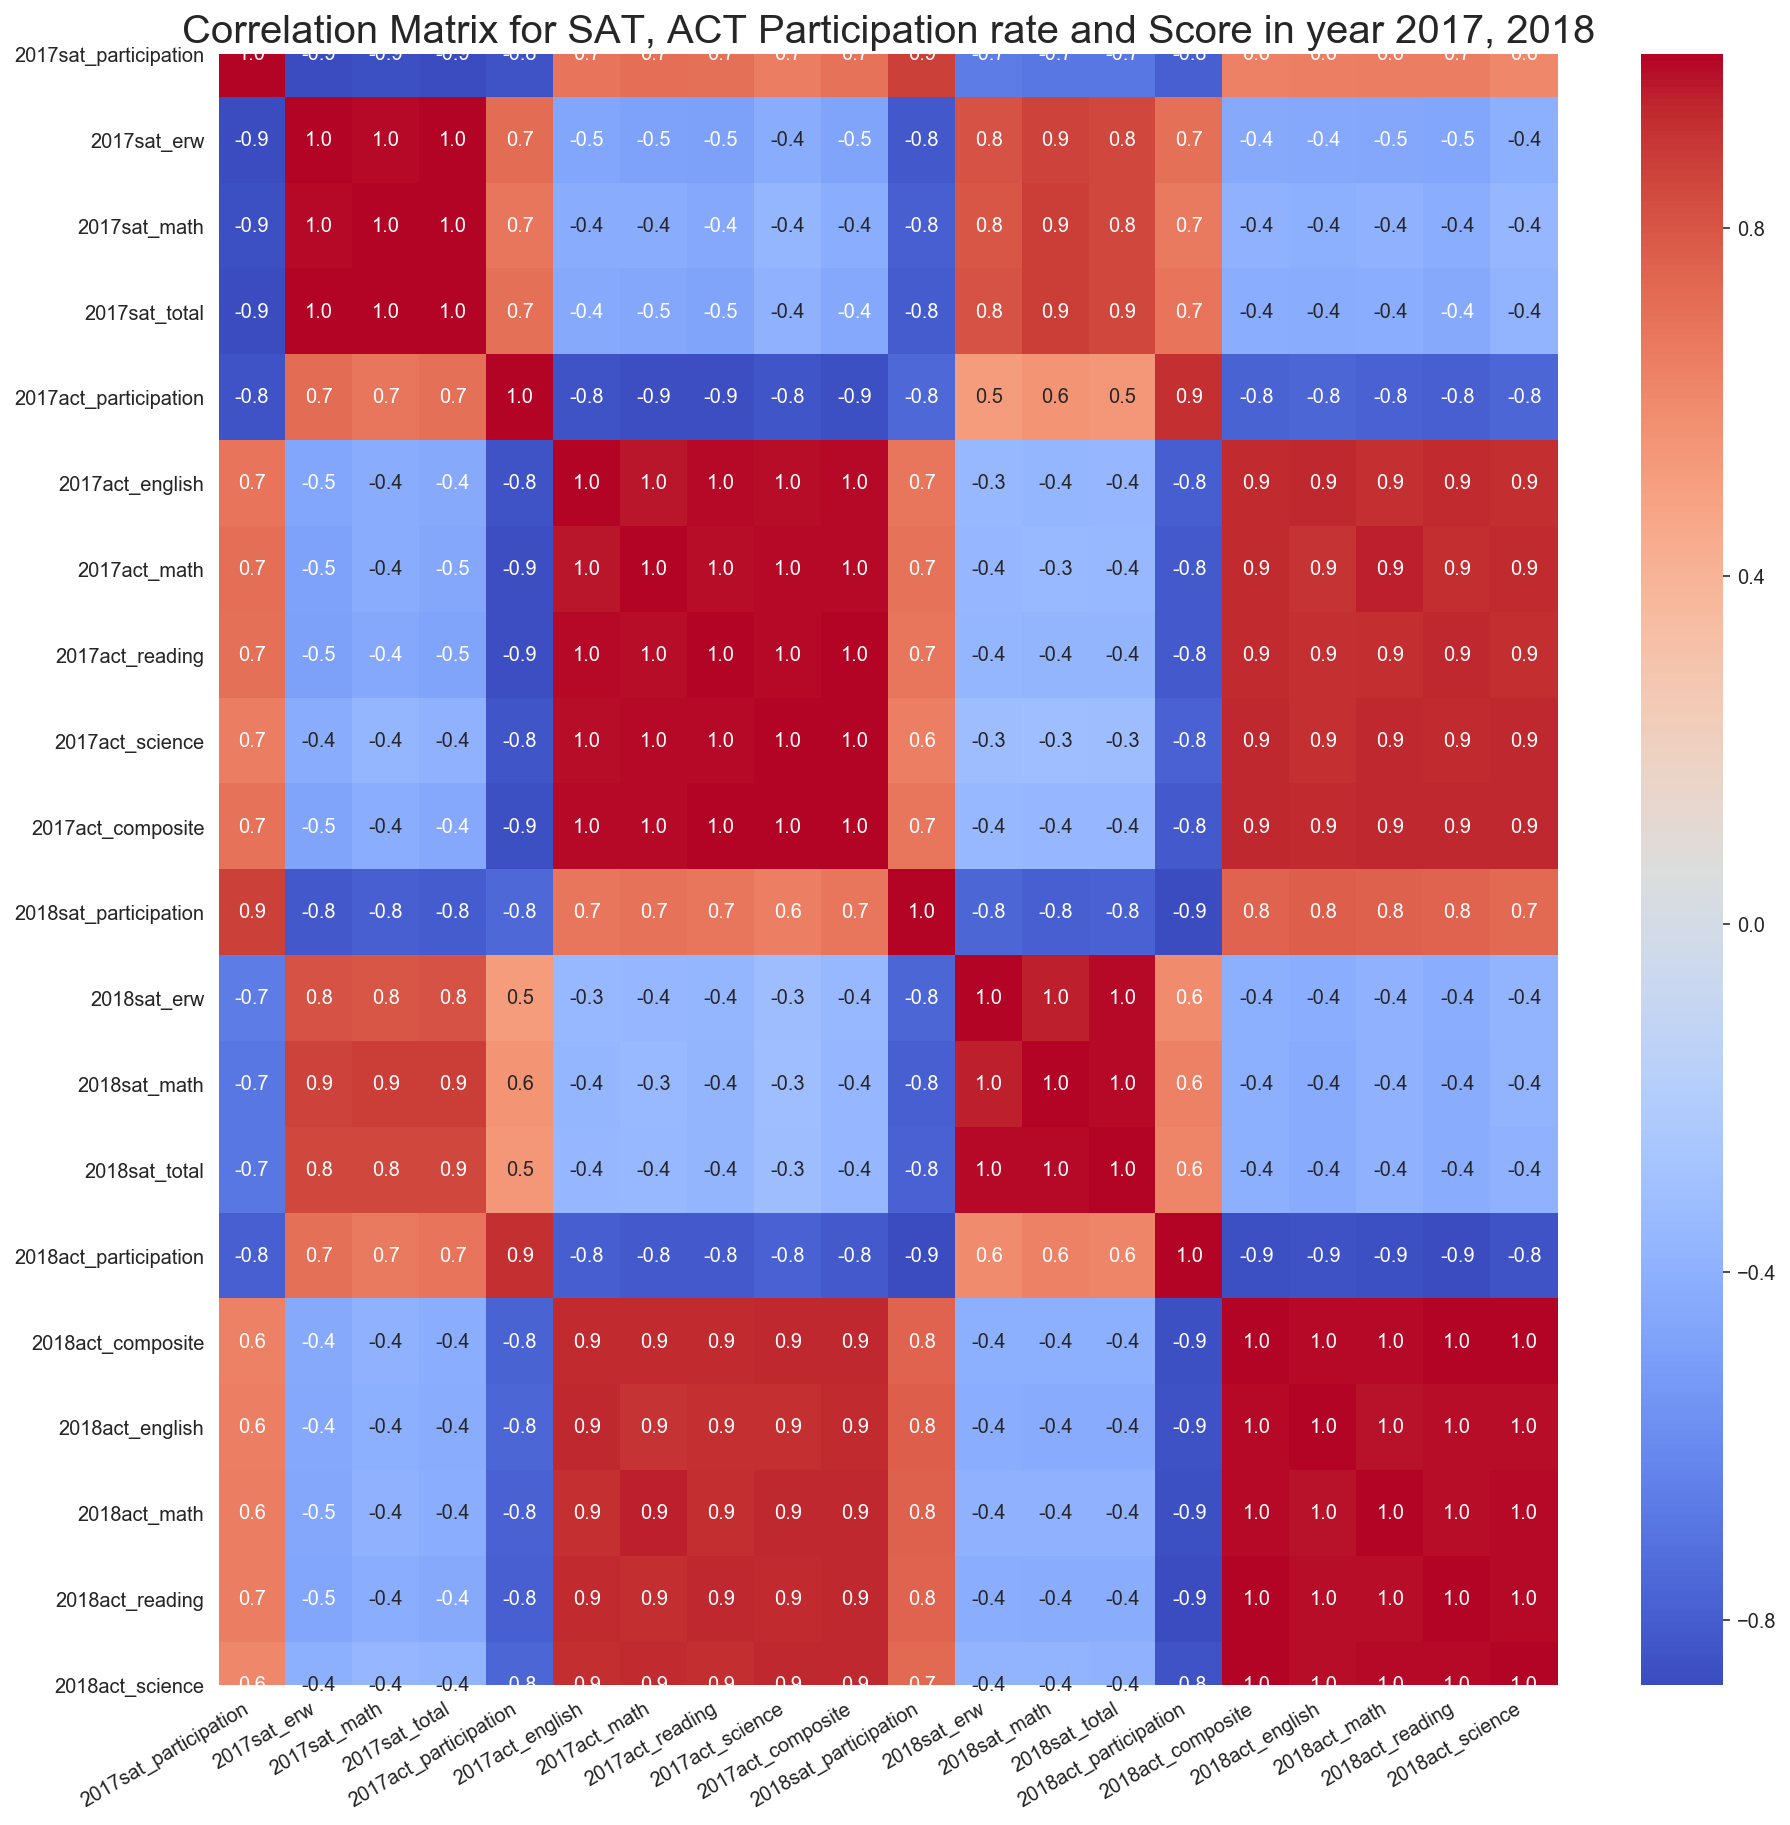

In [58]:
plt.figure(figsize = (15,15))
ax = sns.heatmap(final_correlations, cmap = 'coolwarm', annot = True,
                fmt=".1f", annot_kws={'size':10});

ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, horizontalalignment = 'right');

plt.title('Correlation Matrix for SAT, ACT Participation rate and Score in year 2017, 2018', fontsize = 20);

### Visualization of correlations between all numeric features using heatmap
#### Positive correlation
- SAT score is postive correlated between year 2017 and 2018.
- ACT score is having similar trend.
#### Negative correlation
- ACT participation having negative correlation with its' score. That is, higher score seen in lower participation rate. Same trend observed in SAT.
- SAT participation rate is negative correlated with ACT participation rate.
#### Low correlation
- SAT score is having low correlation to ACT score. 

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [59]:
for i, column in enumerate(['one', 'two', 'three']):
    print (column)


one
two
three


In [60]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(figsize = (15,15), nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 20)
    for i, column in enumerate(list_of_titles):
        ax[i].set_title(column)
    for i, column in enumerate(list_of_xlabels):
        ax[i].set(xlabel = column)
    for i in range(0,len(list_of_columns), 2):
        ax[i].set(ylabel = 'count')
    
    #plt.grid(True)
        # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

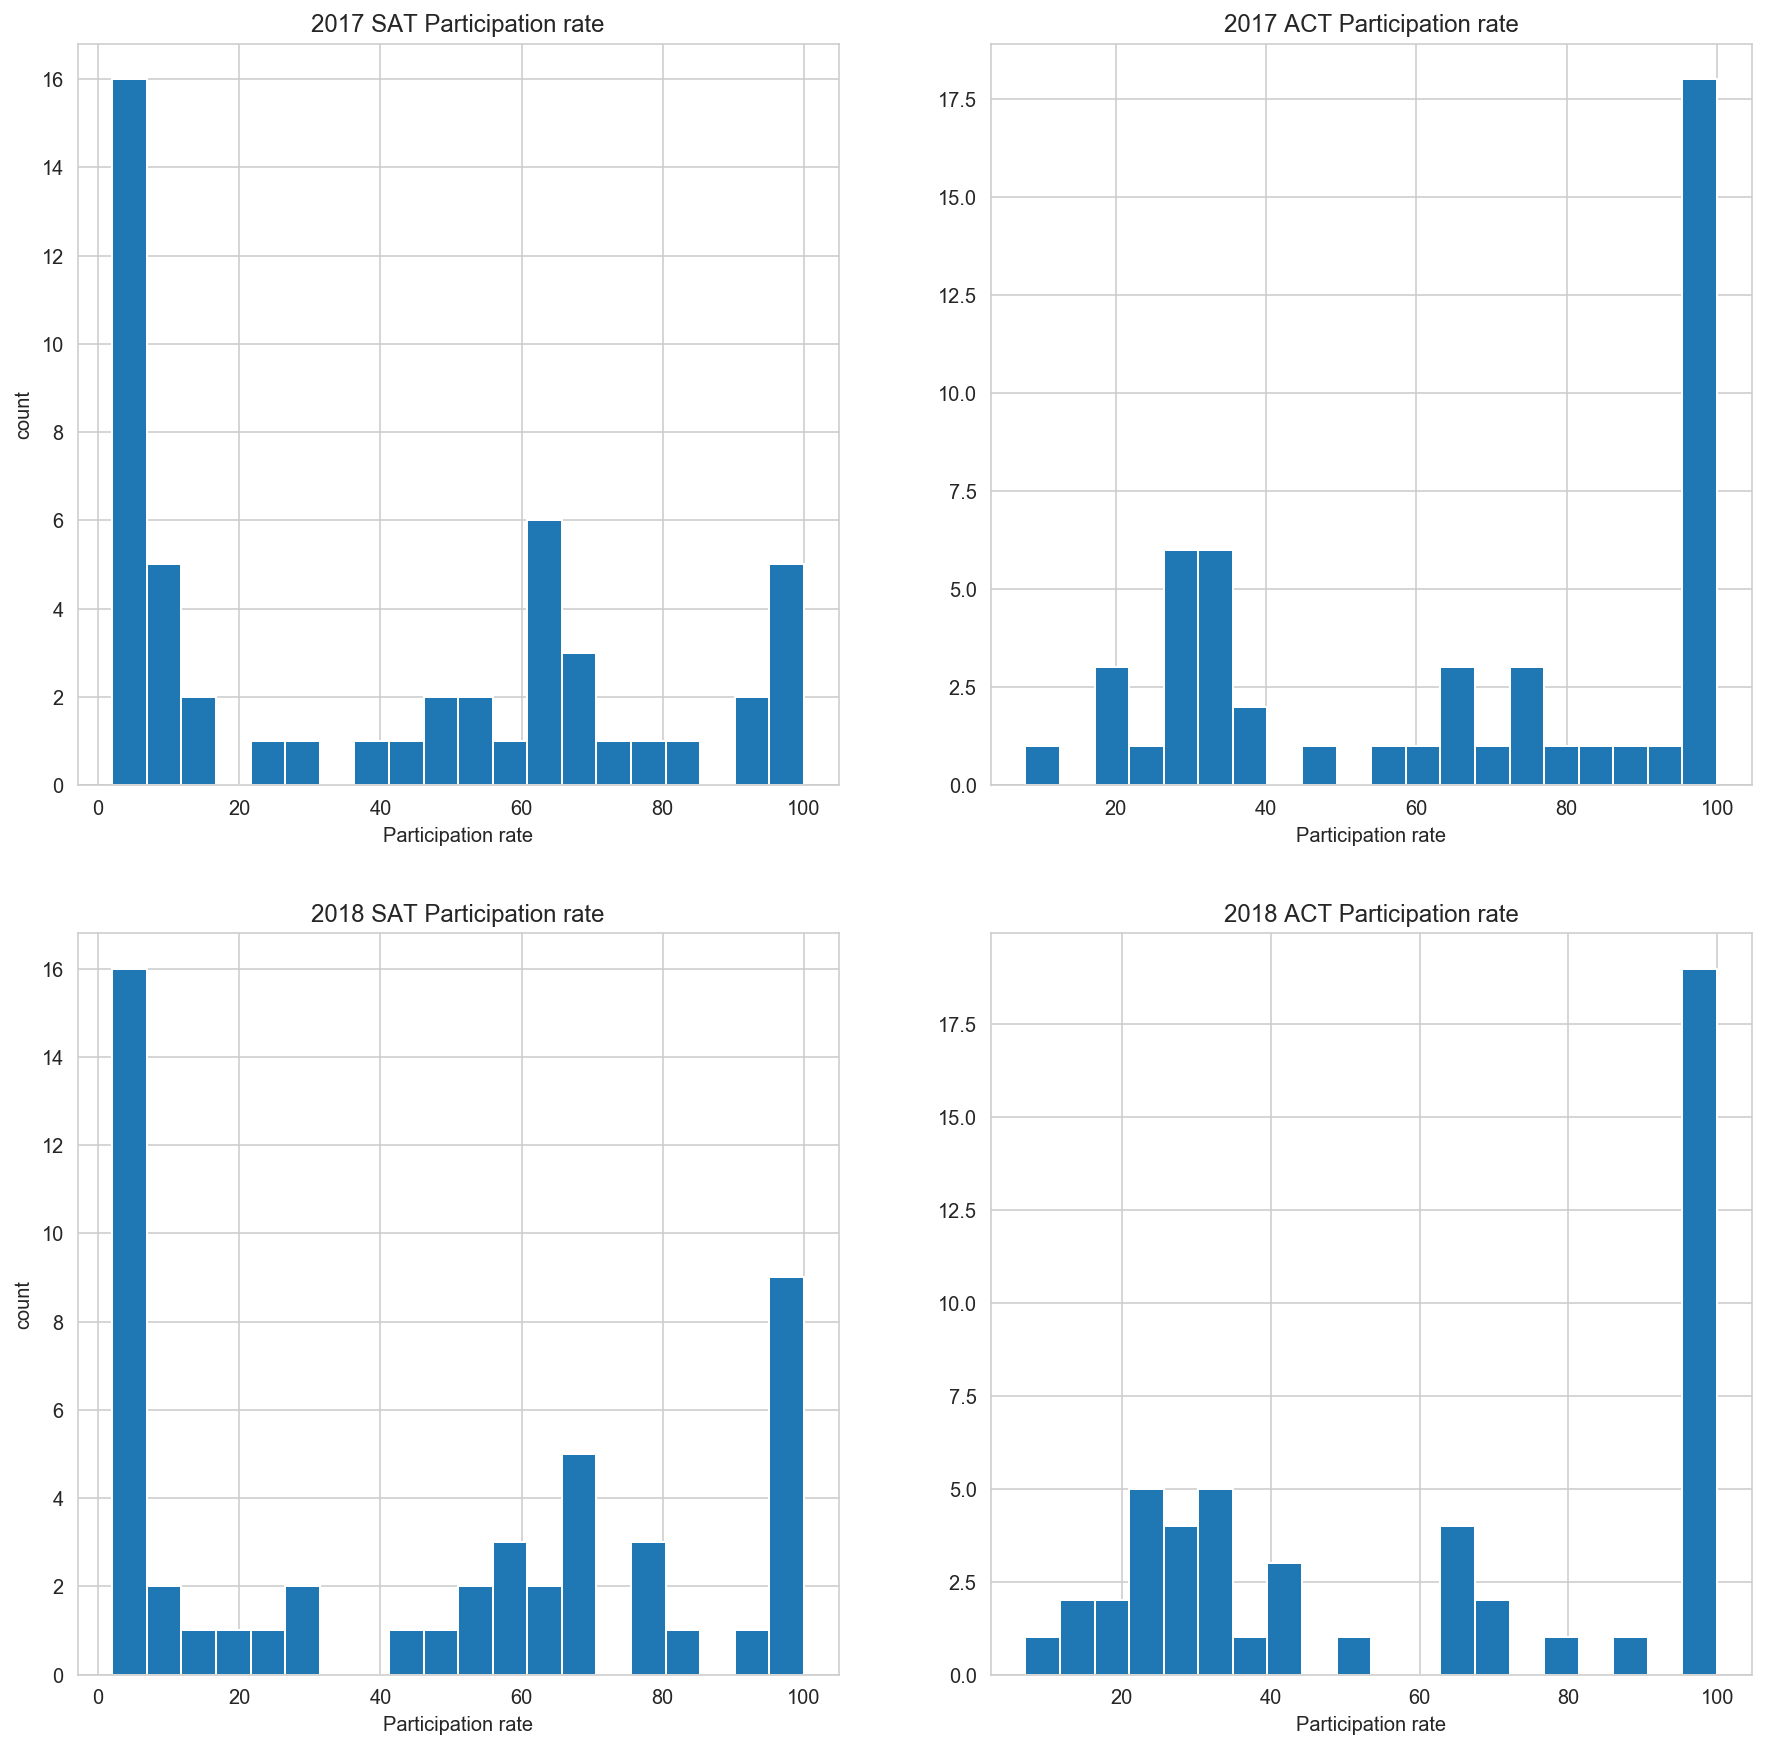

In [61]:
# Histograms: Participation rate
part_rate = ['2017sat_participation', '2017act_participation', '2018sat_participation','2018act_participation']
part_title = ['2017 SAT Participation rate','2017 ACT Participation rate', '2018 SAT Participation rate',
                        '2018 ACT Participation rate']
part_xlable = ['Participation rate', 'Participation rate','Participation rate', 'Participation rate']

subplot_histograms(final, part_rate, part_title, part_xlable)

### Participation rates for SAT & ACT
#### Year 2017
- The histograms for both SAT and ACT is having multiple peaks (multiple modes), with wide spread and non-symmetry.
- ACT is seems to 'skew' to the right, which means, more counts on higher participation rate. This means, it has higher participation rate in more states. SAT is seems to 'skew' to the left, which means opposite. More states have lower participation rate in SAT.
- This supports the negative correlation between SAT and ACT participation rate that seen in the correlation matrix.
#### Year 2018
- The trend is similar to year 2017.

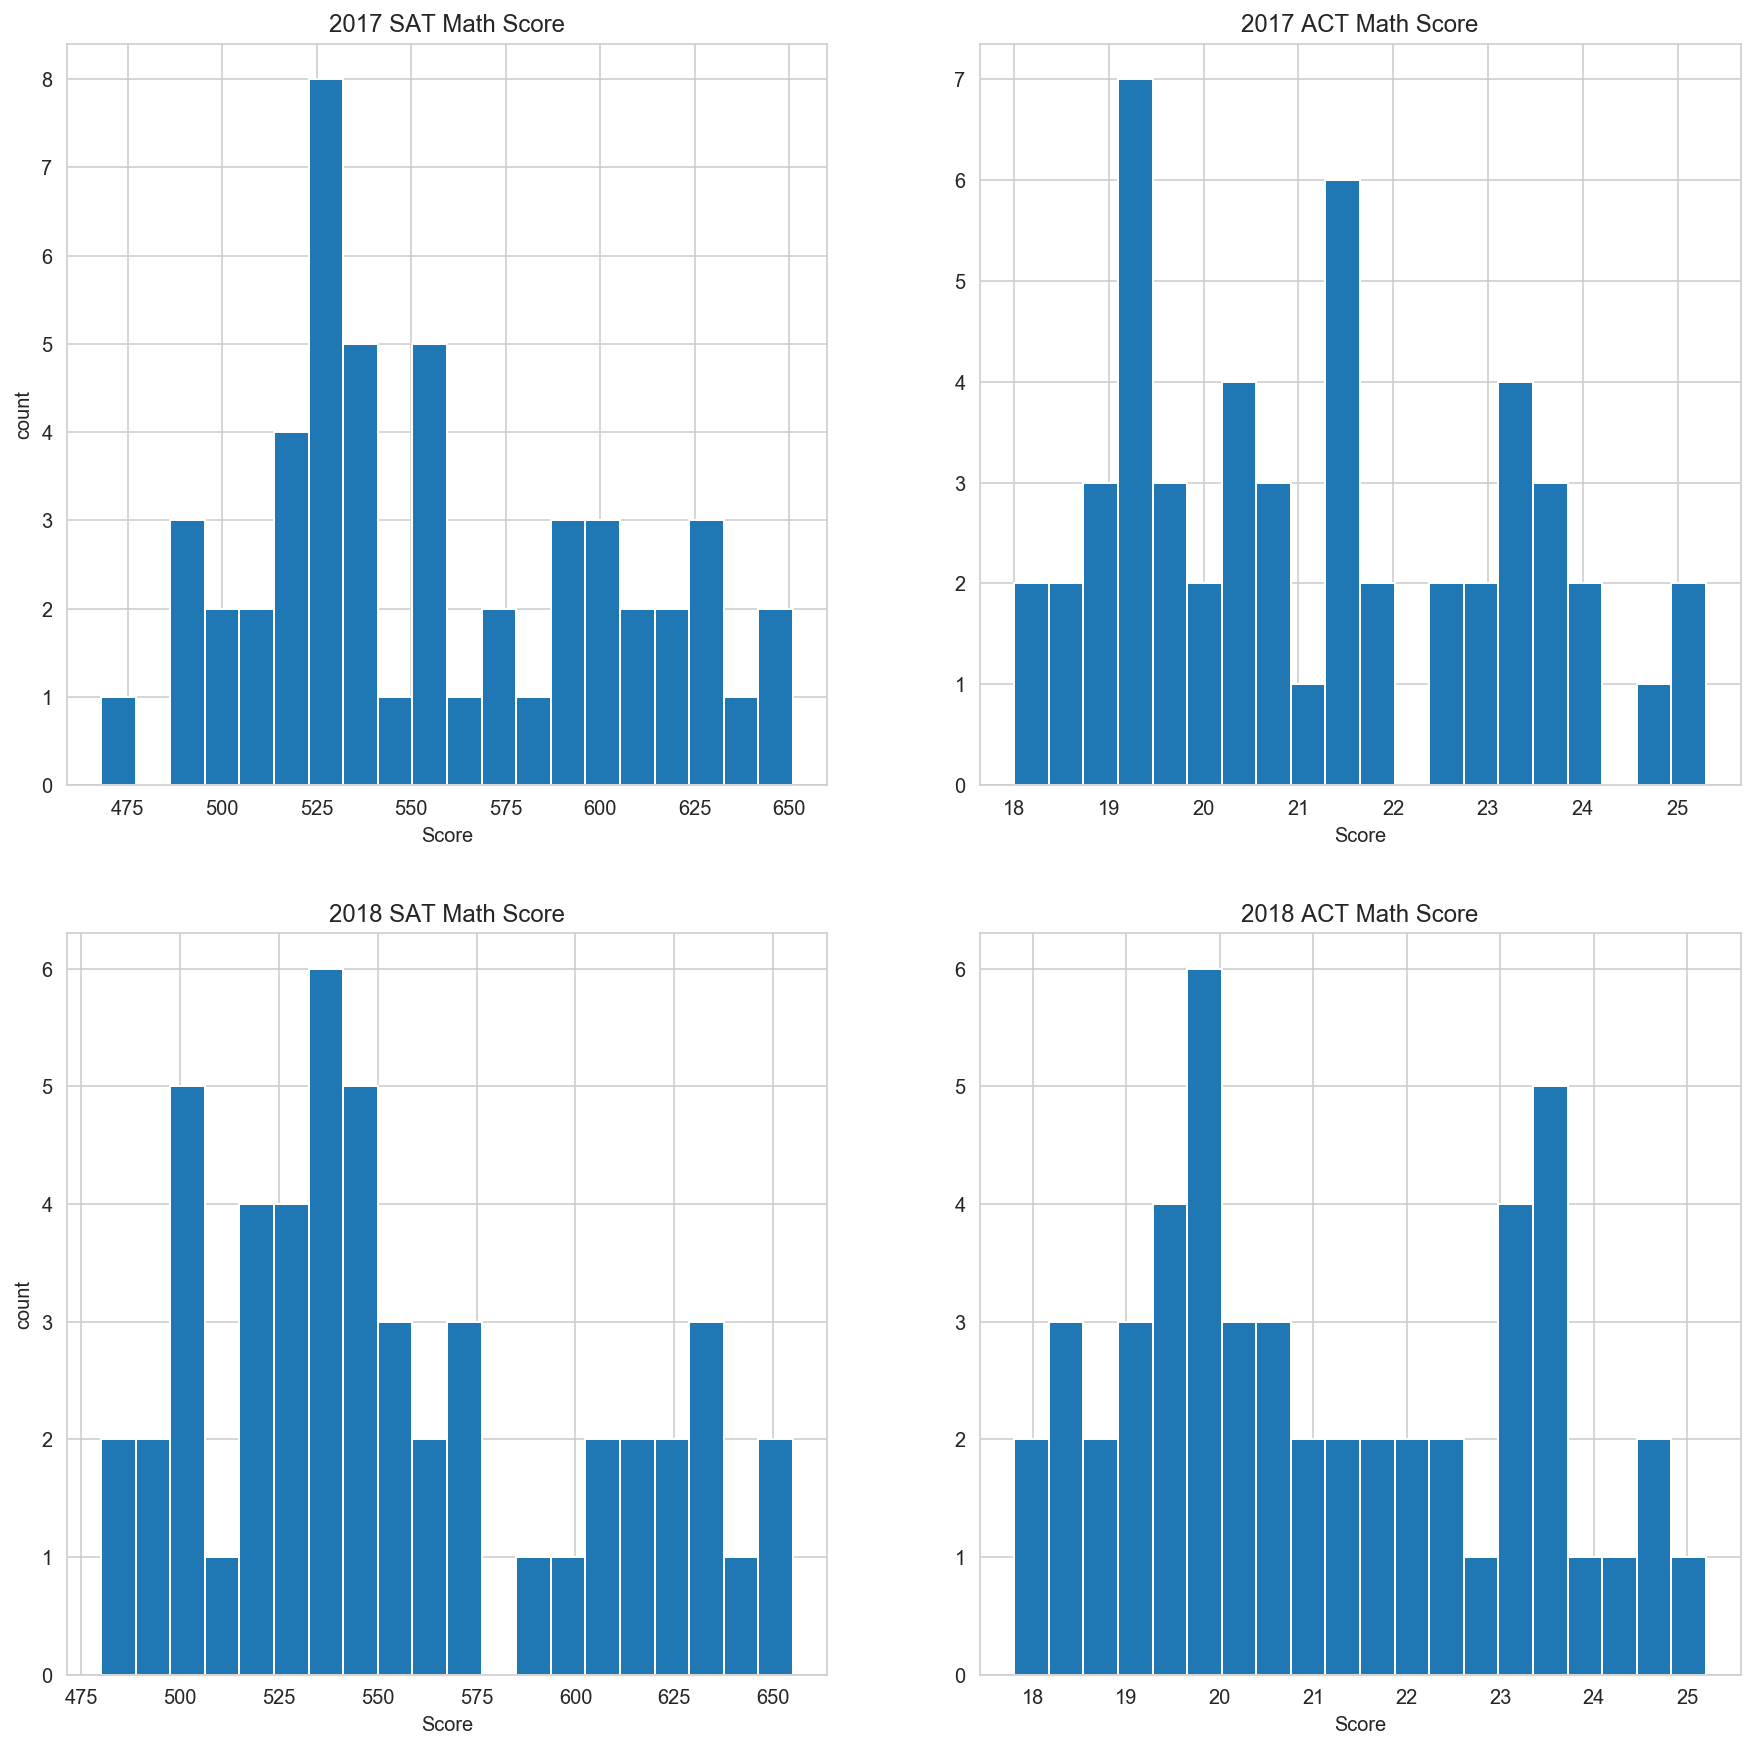

In [62]:
# Histograms: Math score
math_score = ['2017sat_math', '2017act_math', '2018sat_math','2018act_math']
math_title = ['2017 SAT Math Score','2017 ACT Math Score', '2018 SAT Math Score',
                        '2018 ACT Math Score']
math_xlable = ['Score', 'Score','Score', 'Score']

subplot_histograms(final, math_score, math_title, math_xlable)

### Math scores for SAT & ACT
#### Year 2017
- SAT is having 2 peaks whereas multiple peaks seen in ACT Math score.
- The histograms for both SAT and ACT are widely spread and non-symmetry.
- The highest peak for SAT and ACT appears at lower that the median score.
#### Year 2018
- The trend is similar to year 2017.

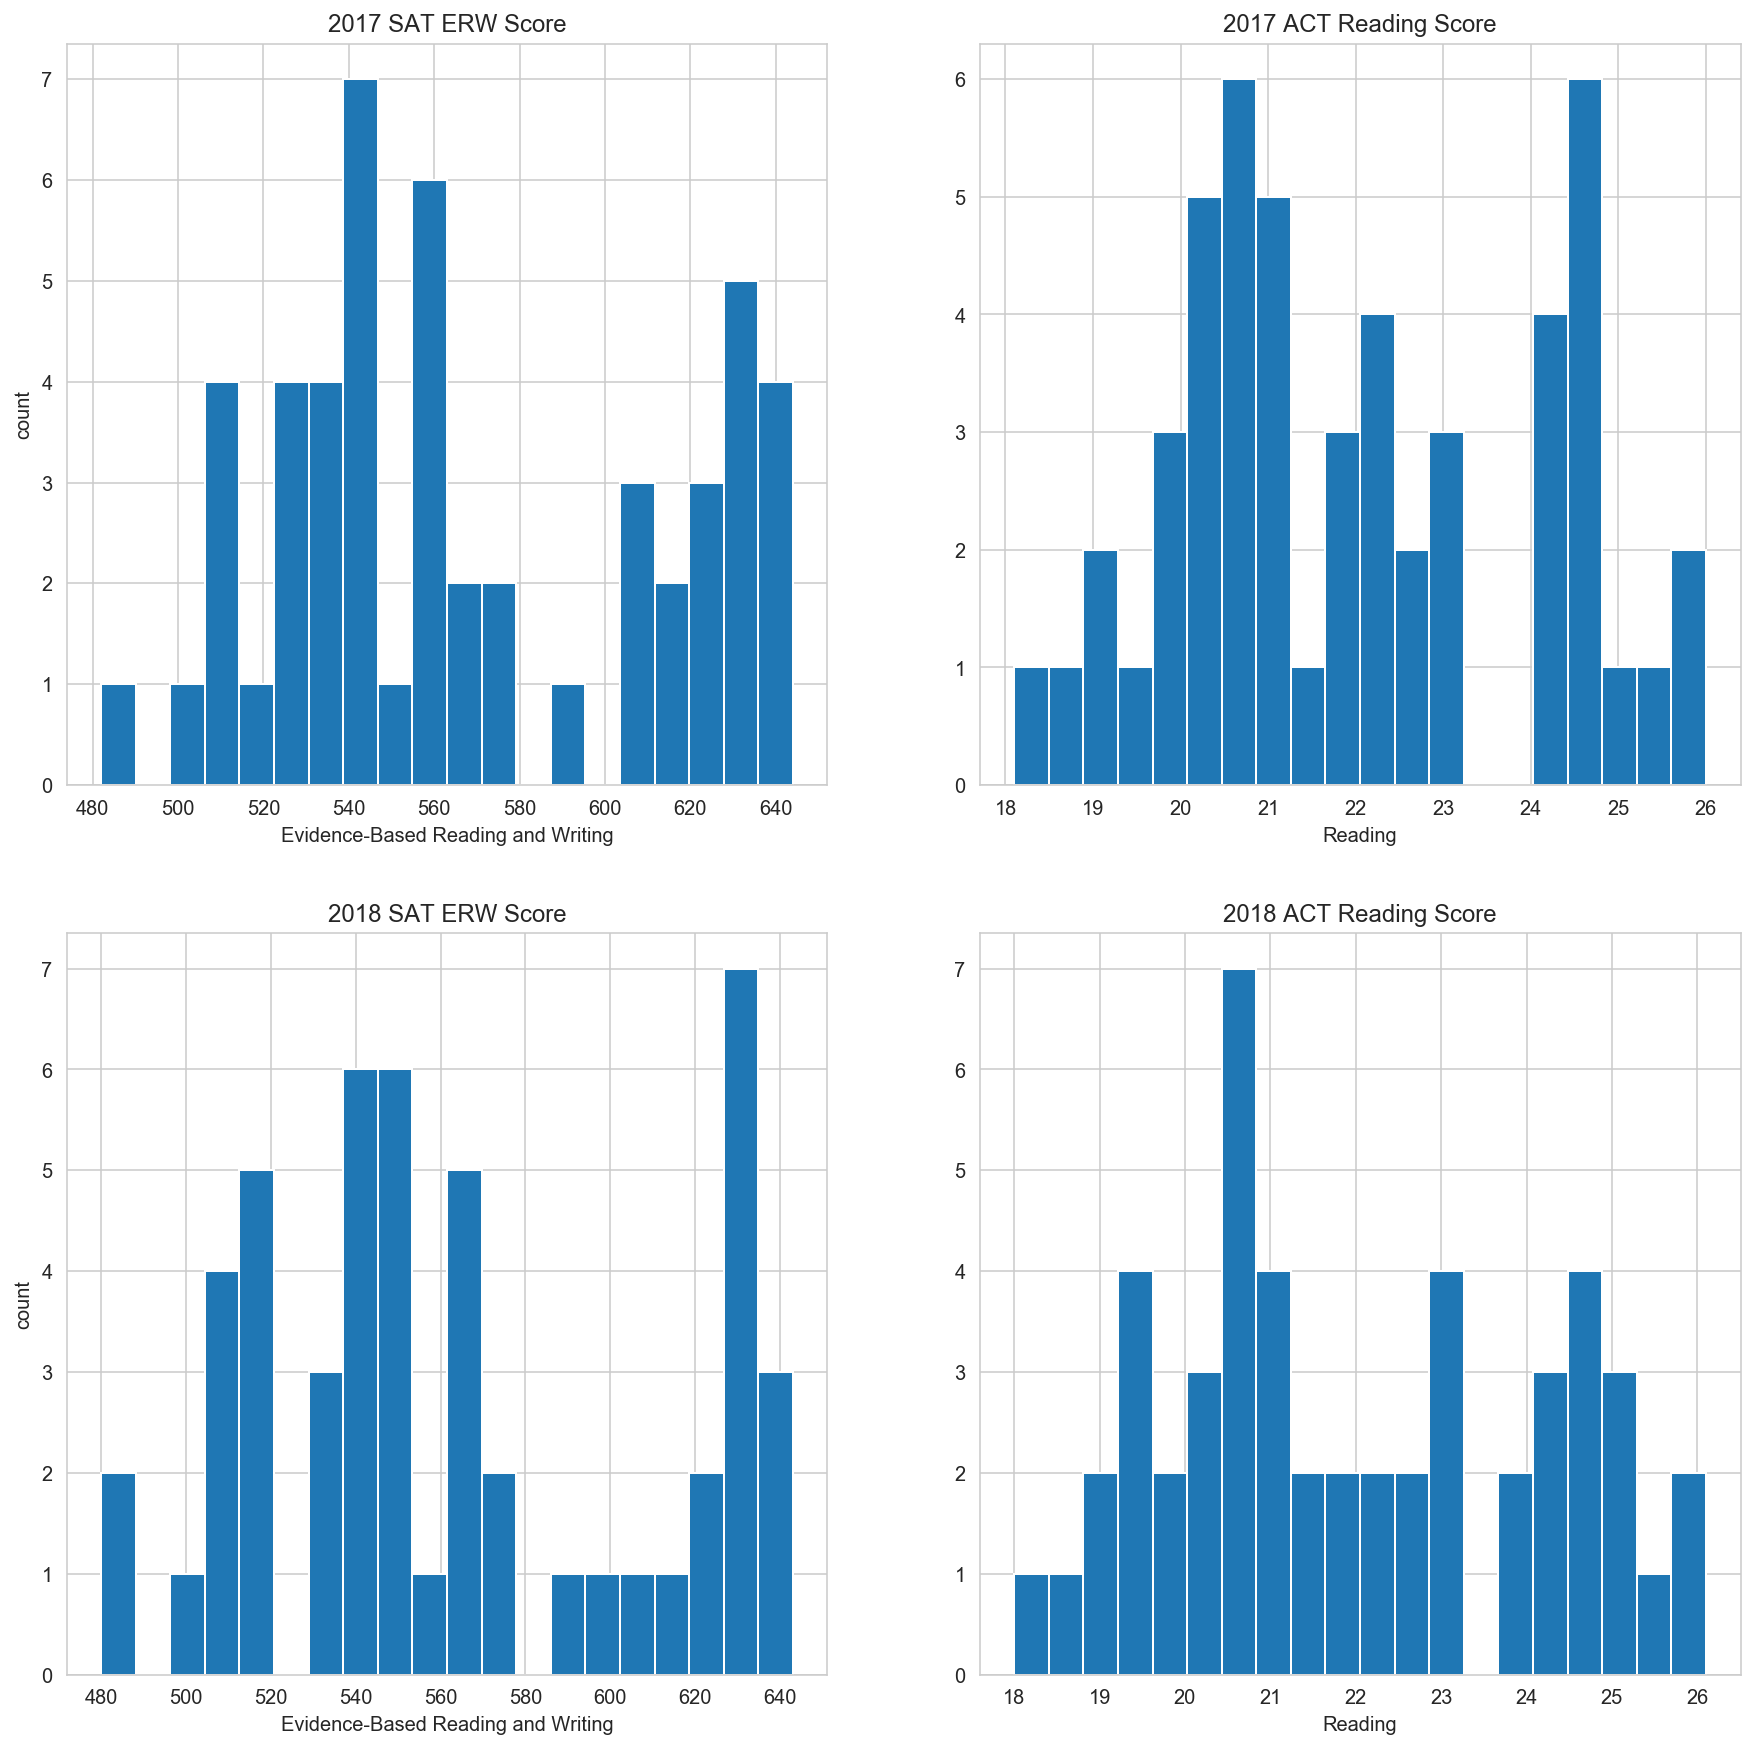

In [63]:
# Histogram: Reading/verbal scores for SAT & ACT

reading_score = ['2017sat_erw', '2017act_reading', '2018sat_erw','2018act_reading']
reading_title = ['2017 SAT ERW Score','2017 ACT Reading Score', '2018 SAT ERW Score',
                        '2018 ACT Reading Score']
reading_xlable = ['Evidence-Based Reading and Writing', 'Reading','Evidence-Based Reading and Writing', 'Reading']

subplot_histograms(final, reading_score, reading_title, reading_xlable)

### Reading/verbal scores for SAT & ACT
#### Year 2017
- SAT and ACT are in general having 2 peaks in reading/verbal scores.
- The histograms for both SAT and ACT are widely spread and non-symmetry.
- The highest peak for SAT and ACT appears at lower that the median score.

#### Year 2018
- SAT highest peak shifted to the right, that means, more state is having higher score in reading in year 2018.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [64]:
# Define function to plot the scatter plot in Seaborn

def sns_scatterplot(dataframe, x_factor, y_factor, title, xlabel, ylabel):
    plt.figure(figsize = (10,8))   
    sns.set_style("ticks")
    
    sns.scatterplot(x = x_factor, y= y_factor, data = dataframe);  #plot scatterplot in sns
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
 

In [65]:
# Define function to plot the data and regression model fits across a FacetGrid

def sns_limplot (dataframe, x_factor, y_factor, title, xlabel, ylabel):
    #plt.figure(figsize = (10,8));  
    sns.set_style("ticks")
    
    sns.lmplot(x = x_factor,      # Select df column name for x axis element
                y = y_factor,      # Select df column name for y axis element
                data = dataframe,  # Select dataframe
                fit_reg = True, # Fix a regression line
                scatter_kws={"s": 30});
    
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

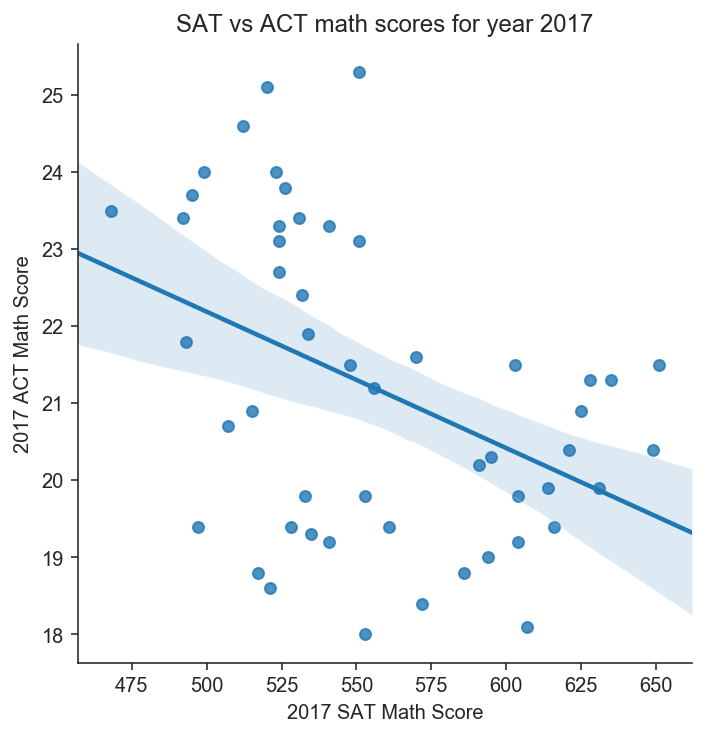

In [66]:
# Plot scatterplot for SAT vs. ACT math scores for 2017 

sns_limplot(final, '2017sat_math', '2017act_math', 'SAT vs ACT math scores for year 2017',
               '2017 SAT Math Score', '2017 ACT Math Score')

In [67]:
# Plot scatterplot for SAT vs. ACT math scores for 2017 
#sns_scatterplot(final, '2017sat_math', '2017act_math', 'SAT vs ACT math scores for year 2017',
#               '2017 SAT Math Score', '2017 ACT Math Score')

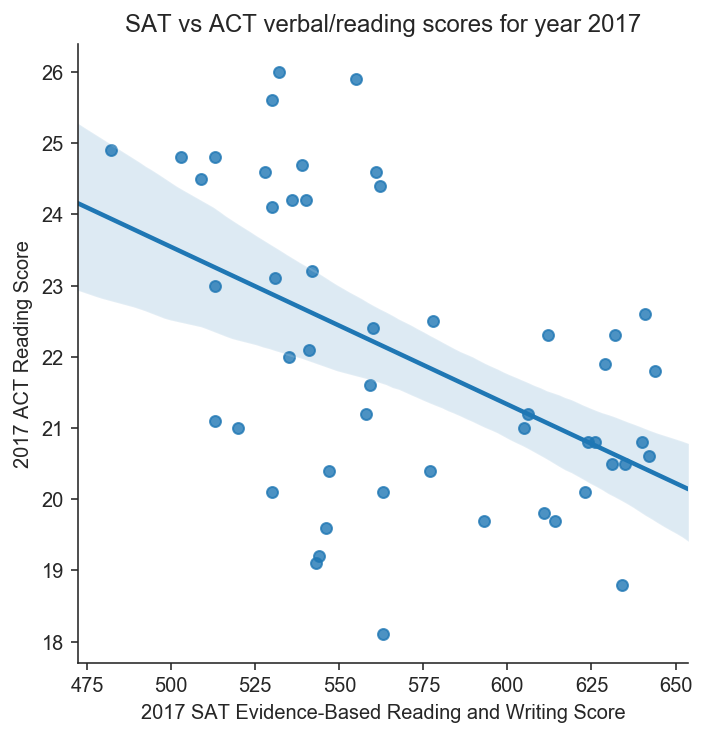

In [68]:
# Plot scatterplot for SAT vs. ACT verbal/reading scores for 2017
sns_limplot(final, '2017sat_erw', '2017act_reading', 'SAT vs ACT verbal/reading scores for year 2017',
               '2017 SAT Evidence-Based Reading and Writing Score', '2017 ACT Reading Score')

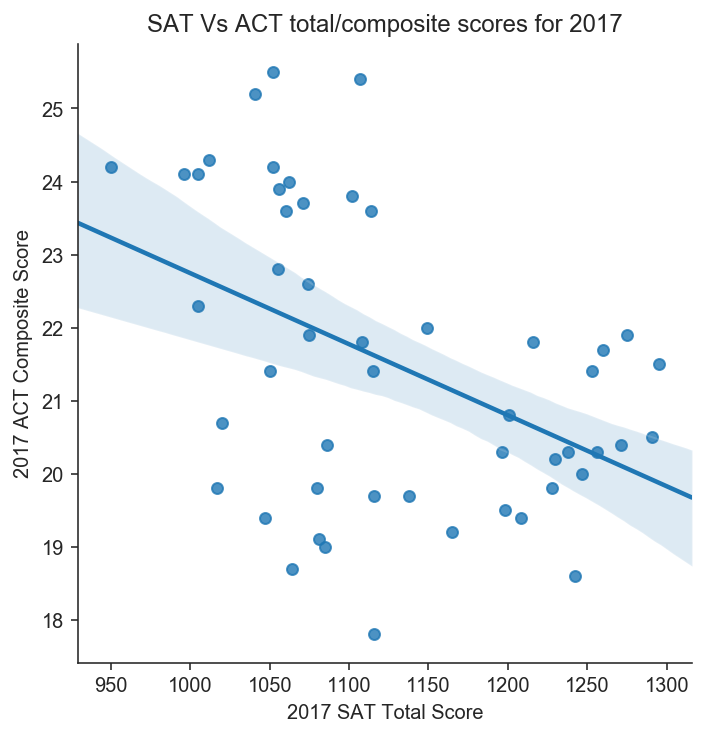

In [69]:
# Plot scatterplot for SAT vs. ACT total/composite scores for 2017
sns_limplot(final, '2017sat_total', '2017act_composite', 'SAT Vs ACT total/composite scores for 2017',
               '2017 SAT Total Score', '2017 ACT Composite Score')

### SAT Vs ACT scores for 2017
#### Math
- No relationship observed between SAT Math score and ACT Math score. This is also seen in the correlation matrix in earlier section. No outliers observed as well.
#### Verbal/ Reading 
- Similarly no relationship and no outliers observed.
#### Total/ Composite 
- Similarly no relationship and no outliers observed.


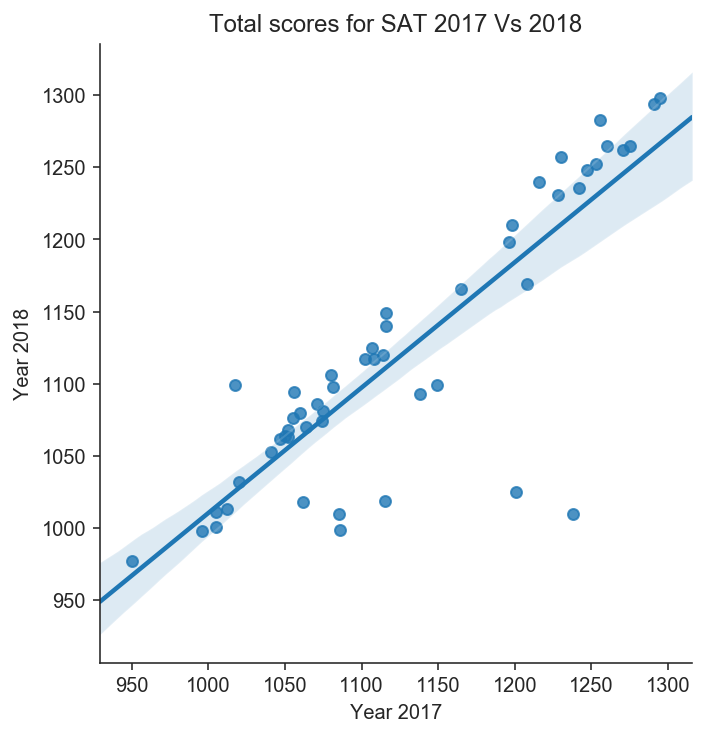

In [70]:
# Plot scatterplot for Total scores for SAT 2017 vs. 2018
sns_limplot(final, '2017sat_total', '2018sat_total', 'Total scores for SAT 2017 Vs 2018',
               'Year 2017', 'Year 2018')

### Total scores for SAT 2017 Vs 2018
- Linear positive relationship observed in the scatter plot for SAT total scores between year 2017 and year 2018. 
- Outliers do observed, which it might affect the regression analysis. Thus, will take note on this to identify the cause of outliers before deciding to isolate it.

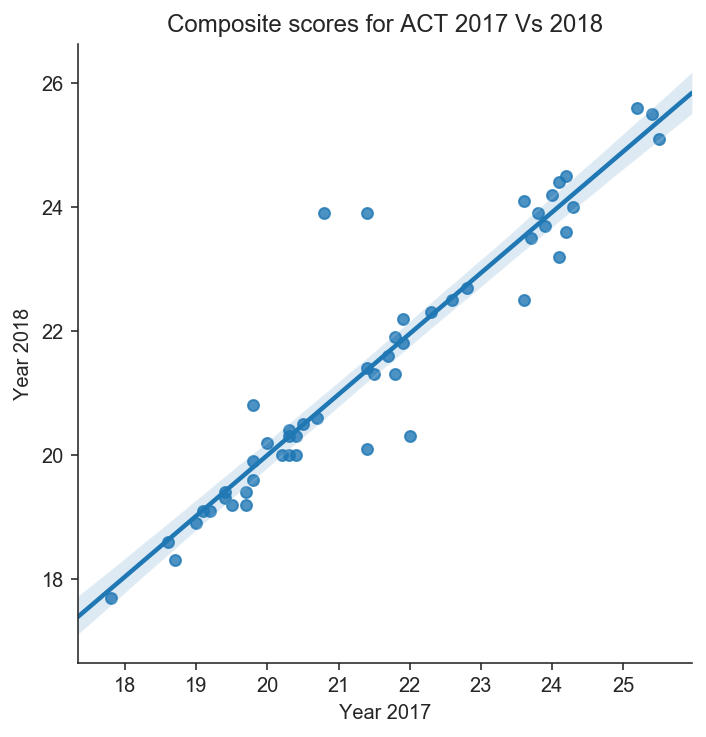

In [71]:
# Plot scatterplot for Composite scores for ACT 2017 vs. 2018
sns_limplot(final, '2017act_composite', '2018act_composite', 'Composite scores for ACT 2017 Vs 2018',
               'Year 2017', 'Year 2018')

Interpret scatterplot here:

### Composite scores for ACT 2017 Vs 2018
- Similarly, linear positive relationship observed in the scatter plot for SAT total scores between year 2017 and year 2018. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 0, '')

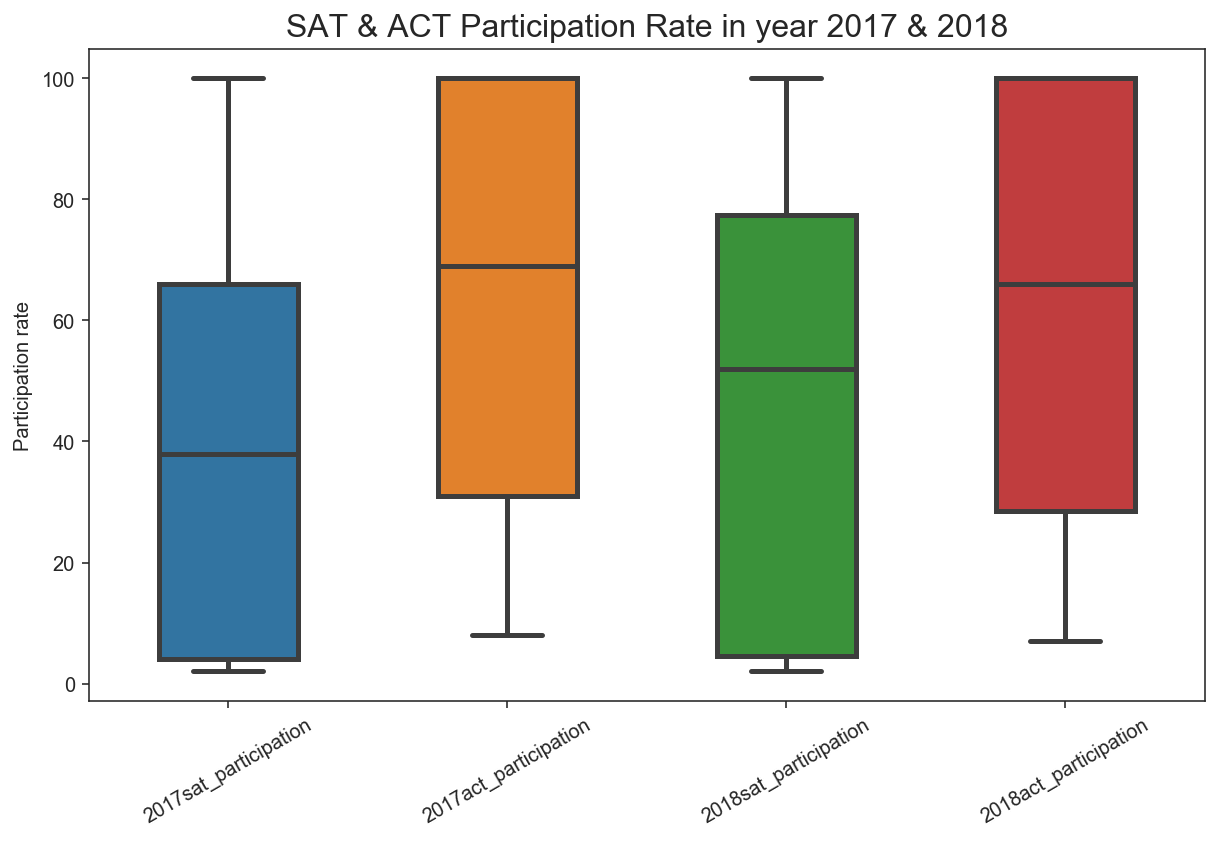

In [72]:
# Boxplot for Participation rate

# create a new dataframe to gather all the participation rate (ACT, SAT, 2017-2018)
participation_df = pd.DataFrame(data = final, columns = ['2017sat_participation', '2017act_participation', 
                                   '2018sat_participation', '2018act_participation'])

plt.figure(figsize = (10,6))        #set the figure size

# botplot using sns
ax = sns.boxplot(x = "variable", y = "value", data = pd.melt(participation_df), 
                 width = 0.5, linewidth=2.5);             
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

plt.title('SAT & ACT Participation Rate in year 2017 & 2018', fontsize = 16);
plt.ylabel('Participation rate')
plt.xlabel('')

### Boxplot for SAT and ACT Participation Rate in year 2017 and 2018
- The median participation rate (represented by the line in the box) for SAT is lower compared to ACT.
- The interquartile range box (that represents the middle 50% of the participation rate) for both SAT and ACT observed to have similar spread.
- SAT participation rate is skewed right, whereas ACT participation rate is skewed left.
- This indicates that, more state is with lower participation rate in SAT. 
- This trend is the same in both year 2017 and 2018

Text(0.5, 0, '')

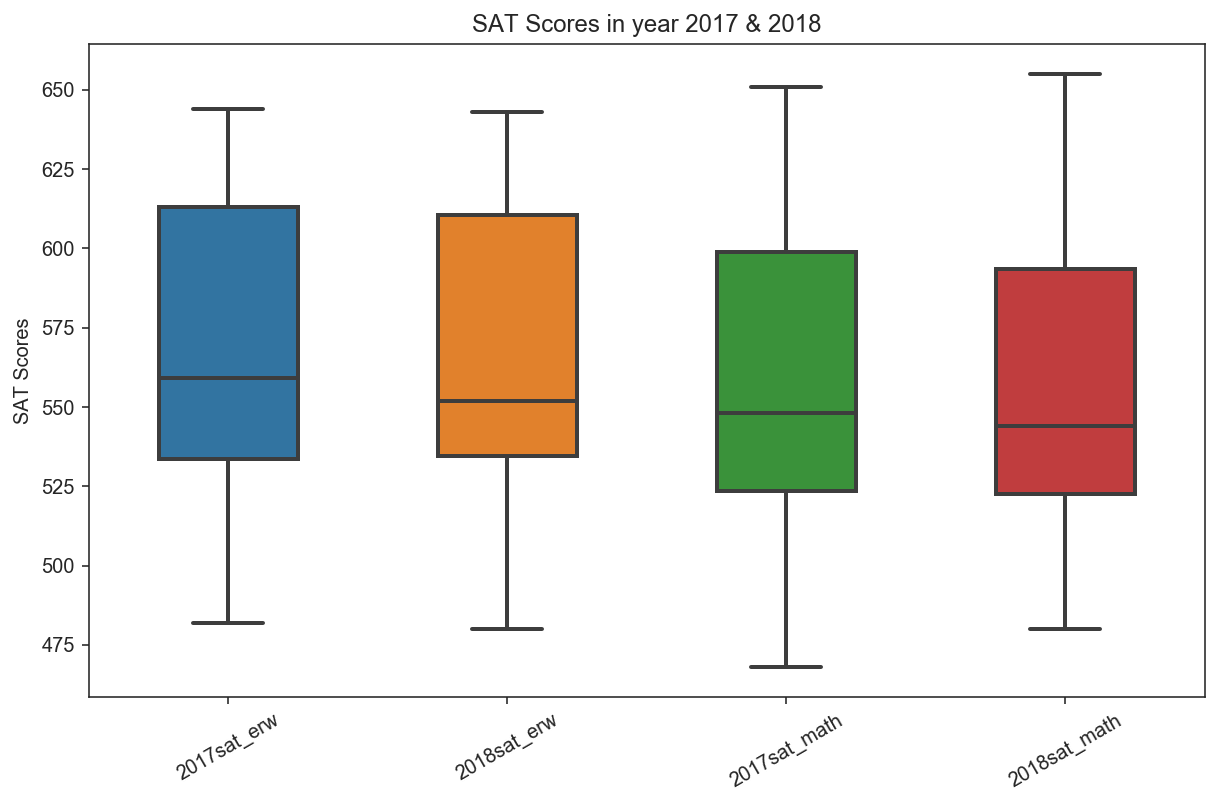

In [73]:
# Boxplot for SAT Subject Scores

# create a new dataframe to gather all the SAT Scores (2017-2018)
sat_score_df = pd.DataFrame(data = final, columns = ['2017sat_erw', '2018sat_erw', 
                                   '2017sat_math', '2018sat_math'])

plt.figure(figsize = (10,6))        #set the figure size

# botplot using sns
ax = sns.boxplot(x = "variable", y = "value", data = pd.melt(sat_score_df), 
                 width = 0.5, linewidth = 2);             
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

plt.title('SAT Scores in year 2017 & 2018');
plt.ylabel('SAT Scores')
plt.xlabel('')

Text(0.5, 0, '')

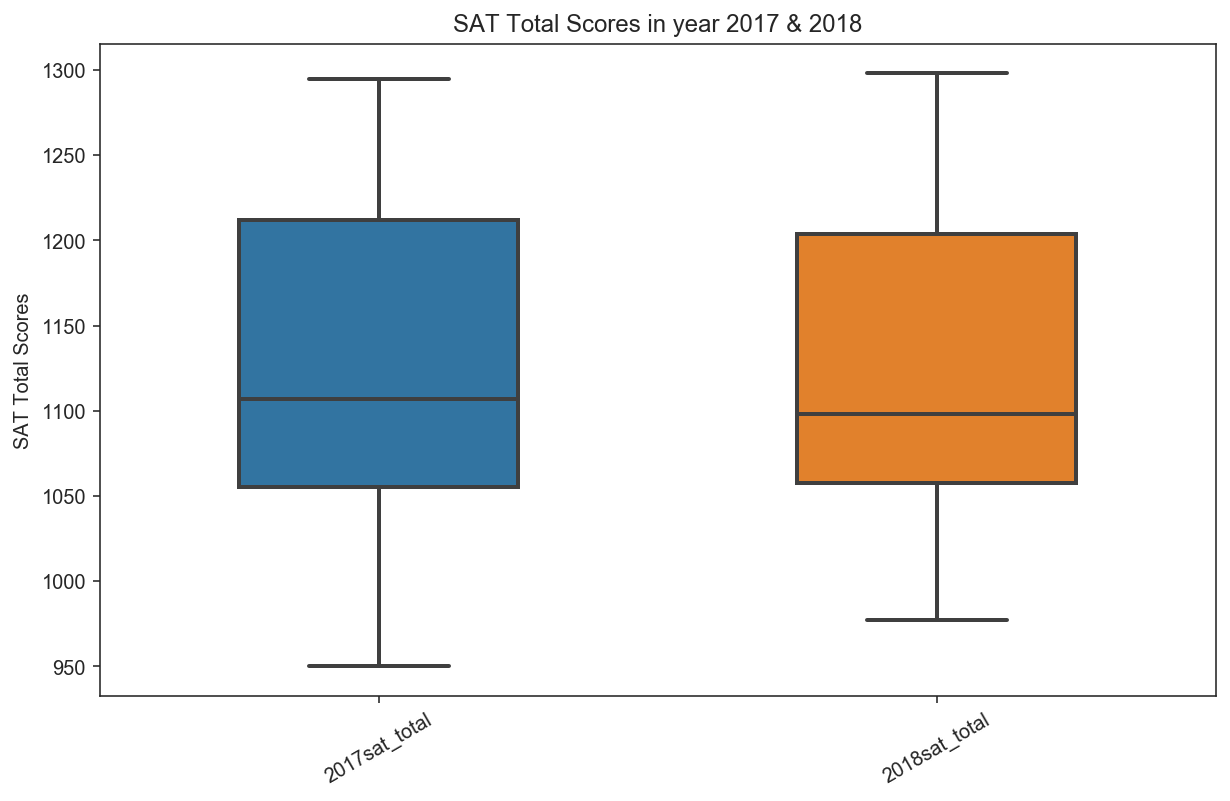

In [74]:
# # Boxplot for SAT Total Scores

# create a new dataframe to gather all the SAT Total Scores (2017-2018)
sat_total_df = pd.DataFrame(data = final, columns = ['2017sat_total', '2018sat_total'])

plt.figure(figsize = (10,6))        #set the figure size

# botplot using sns
ax = sns.boxplot(x = "variable", y = "value", data = pd.melt(sat_total_df), 
                 width = 0.5, linewidth = 2);             
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

plt.title('SAT Total Scores in year 2017 & 2018')
plt.ylabel('SAT Total Scores')
plt.xlabel('')

### Boxplot for SAT Scores in year 2017 and 2018
#### Evidence-Based Reading and Writing (ERW) and Math
- In general, no significant differences observed in the SAT scores' box plot. 
- The spread is similar and data is not skewed.

#### Total
- No significant differencs observed int total SAT scores' box plot. Data is not skewed as well.

Text(0.5, 0, '')

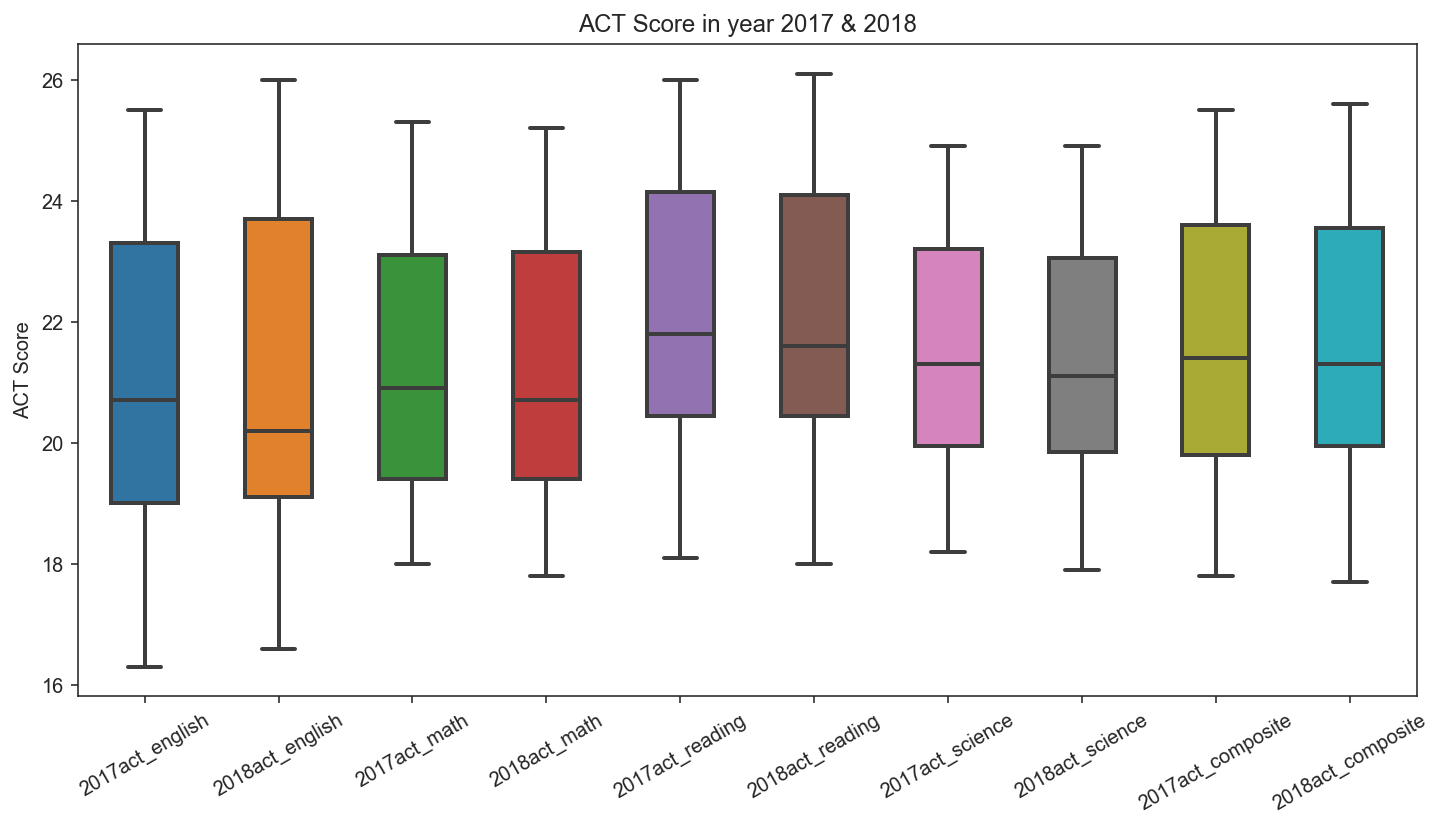

In [75]:
# Boxplot for ACT Scores

# create a new dataframe to gather all the ACT Scores (2017-2018)
act_score_df = pd.DataFrame(data = final, columns = ['2017act_english', '2018act_english', '2017act_math',
                        '2018act_math', '2017act_reading', '2018act_reading', '2017act_science',
                    '2018act_science', '2017act_composite', '2018act_composite'])

plt.figure(figsize = (12,6))        #set the figure size

# botplot using sns
ax = sns.boxplot(x = "variable", y = "value", data = pd.melt(act_score_df), 
                 width = 0.5, linewidth = 2);             
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);

plt.title('ACT Score in year 2017 & 2018');
plt.ylabel('ACT Score')
plt.xlabel('')

### Boxplot for ACT Scores in year 2017 and 2018
- English score is having slightly larger spread.
- Median score is slightly higher compared to the rest.
- The boxplot does not skewed to either side among all the subjects.
- Same trend observed in year 2017 and 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

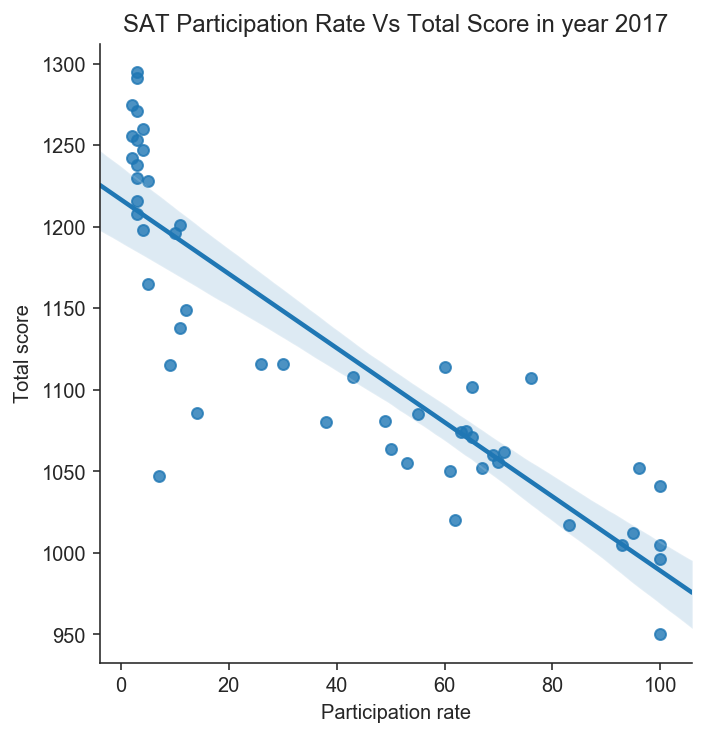

In [76]:
# Plot scatterplot for SAT Participation Rate Vs Total Score in year 2017
sns_limplot(final, '2017sat_participation', '2017sat_total', 
                'SAT Participation Rate Vs Total Score in year 2017',
               'Participation rate', 'Total score')

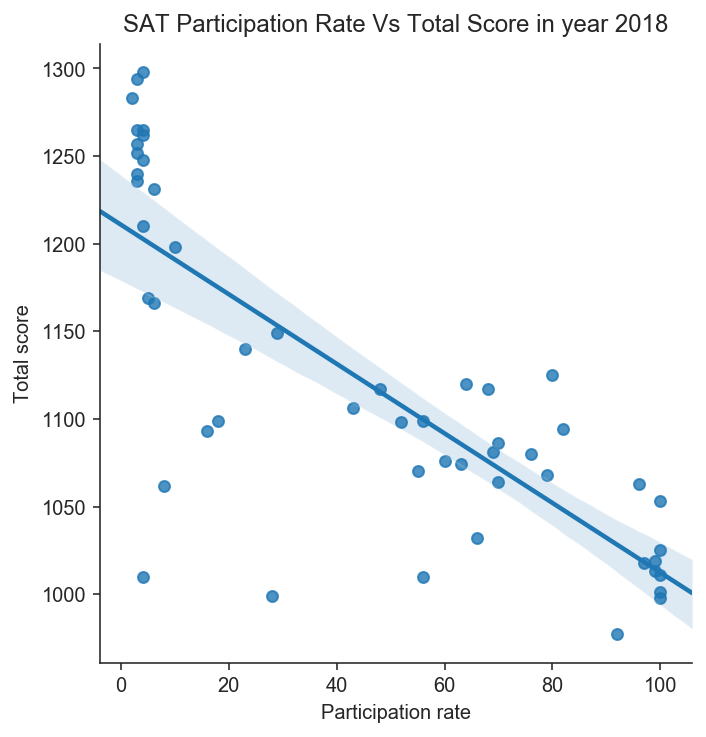

In [77]:
# Plot scatterplot for SAT Participation Rate Vs Total Score in year 2018
sns_limplot(final, '2018sat_participation', '2018sat_total', 
                'SAT Participation Rate Vs Total Score in year 2018',
               'Participation rate', 'Total score')

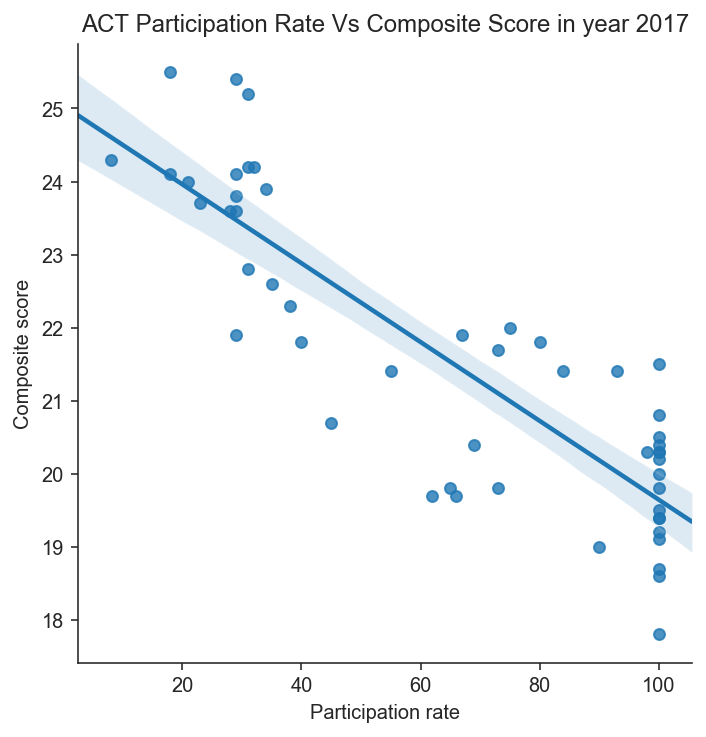

In [78]:
# Plot scatterplot for ACT Participation Rate Vs Composite Score in year 2017
sns_limplot(final, '2017act_participation', '2017act_composite', 
                'ACT Participation Rate Vs Composite Score in year 2017',
               'Participation rate', 'Composite score')

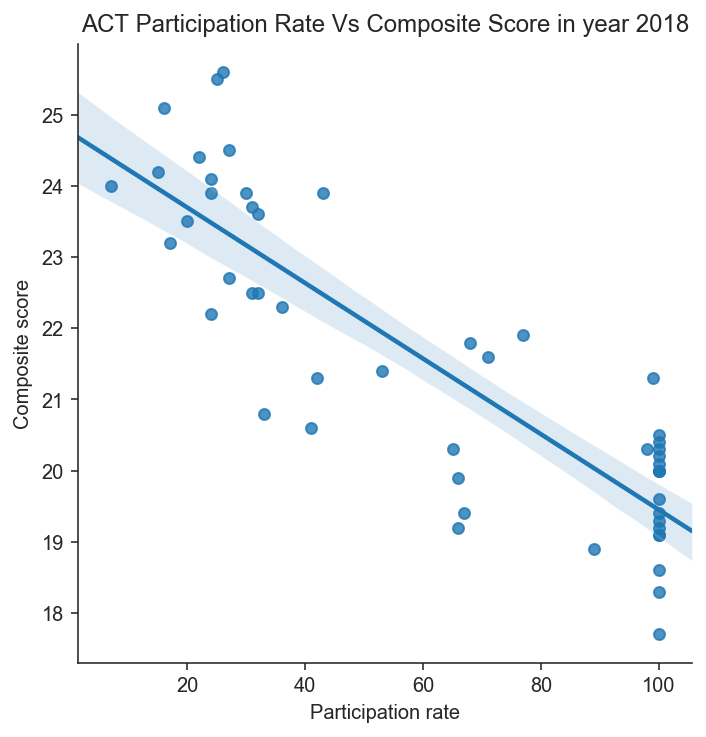

In [79]:
# Plot scatterplot for ACT Participation Rate Vs Composite Score in year 2018
sns_limplot(final, '2018act_participation', '2018act_composite', 
                'ACT Participation Rate Vs Composite Score in year 2018',
               'Participation rate', 'Composite score')

### Scatter plot for Participation Rate Vs Score
#### SAT
- Negative relationship observed in the scatter plot between SAT participation rate and SAT total scores in year 2017 and 2018.

#### ACT
- Similarly, ACT also seeing similar trend.

<Figure size 1080x432 with 0 Axes>

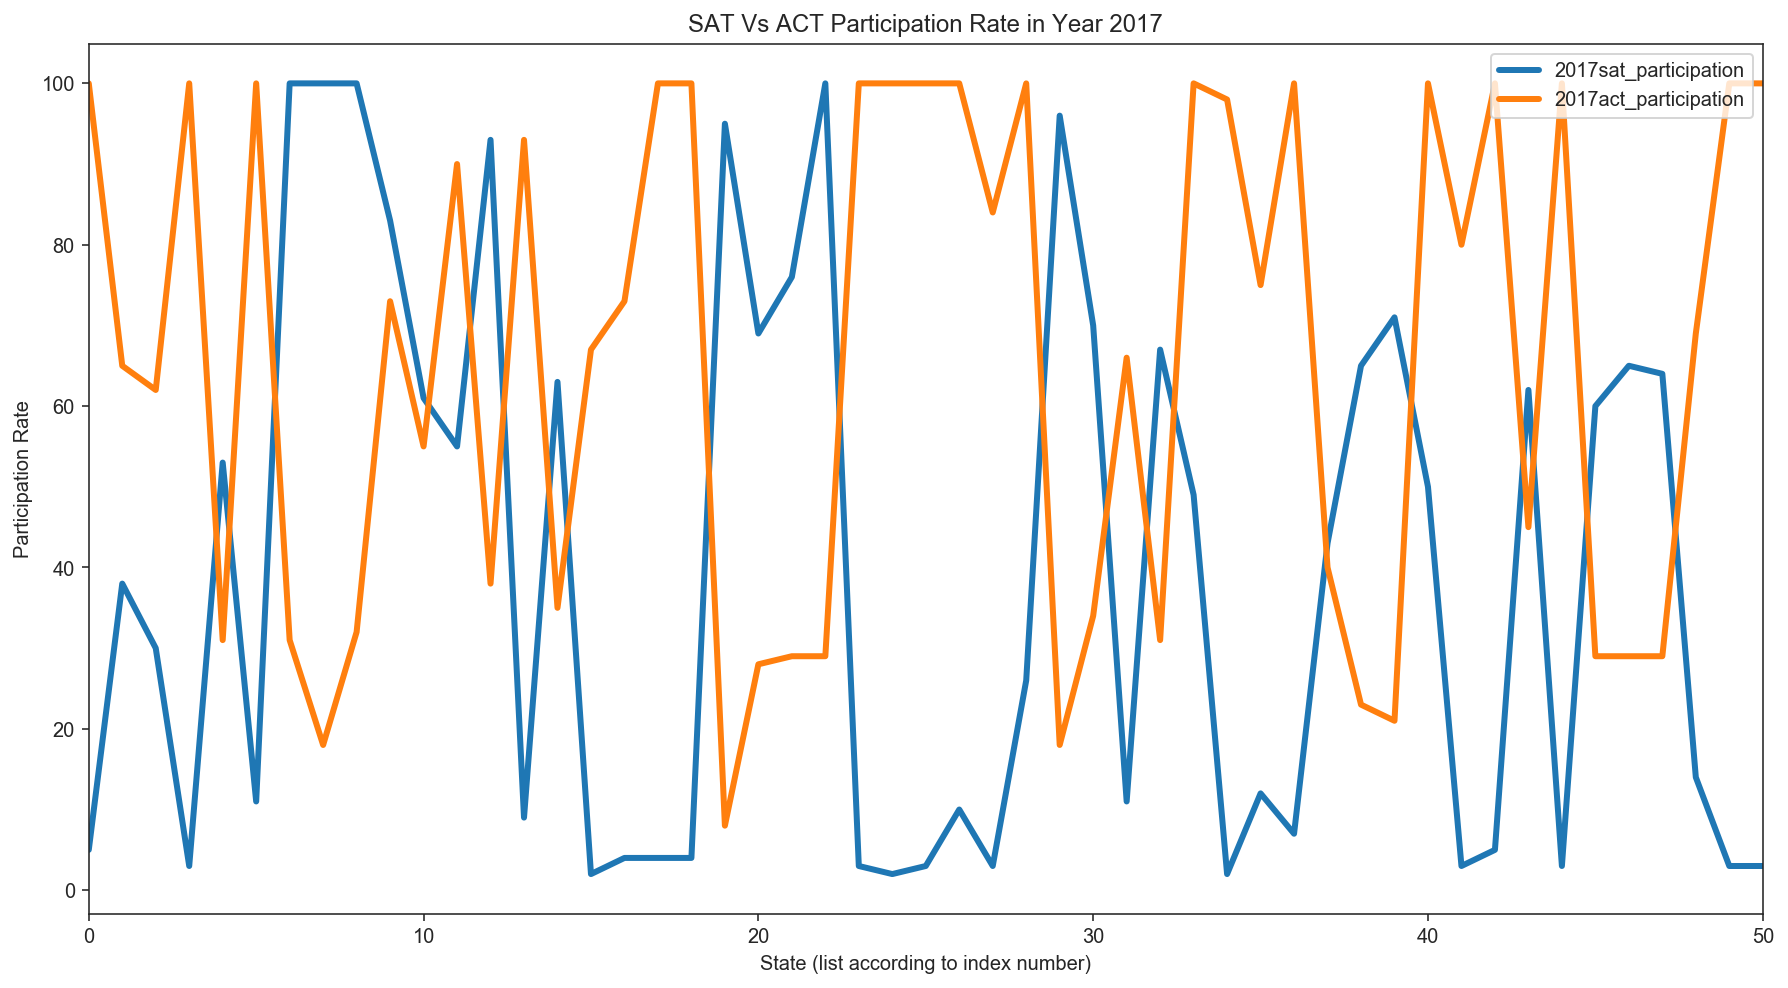

In [80]:
#Lineplot for SAT Vs ACT Participation Rate in Year 2017
plt.figure(figsize = (15,6));
ax = final[['2017sat_participation', '2017act_participation']].plot(figsize = (15,8), linewidth = 3);

plt.xlabel('State (list according to index number)');
plt.ylabel('Participation Rate');
plt.title('SAT Vs ACT Participation Rate in Year 2017');
ax.legend(loc=1);


<Figure size 1080x432 with 0 Axes>

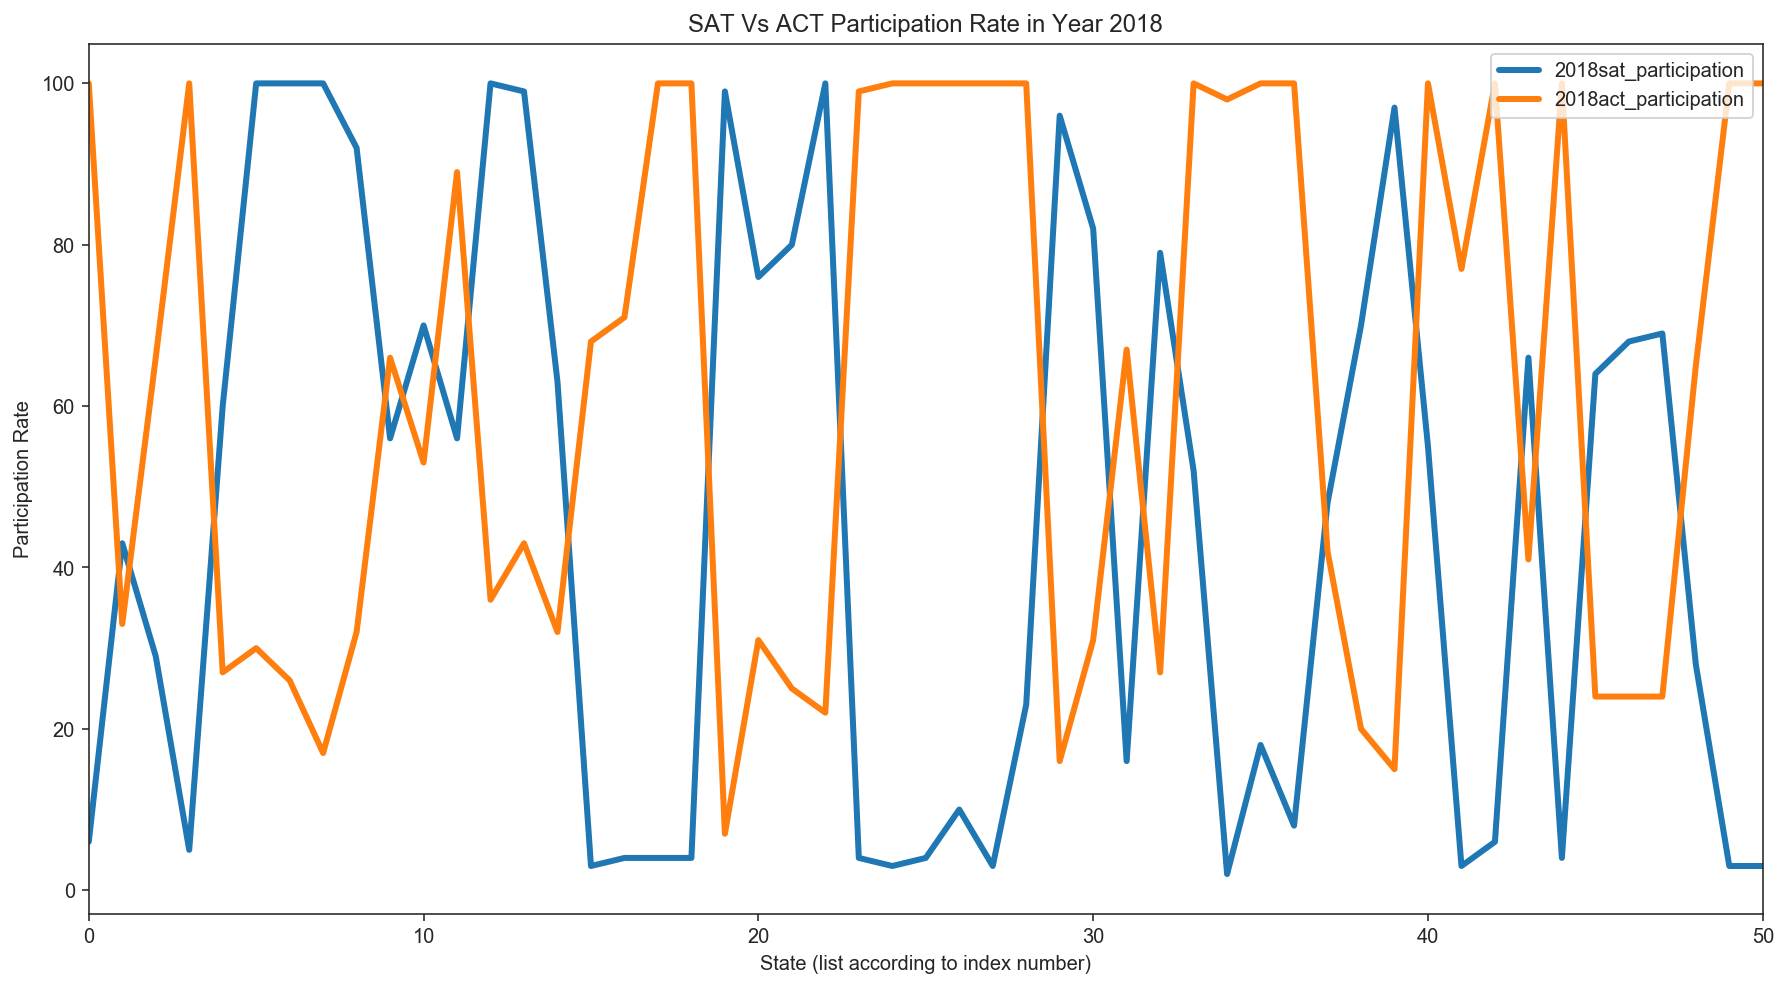

In [81]:
#Lineplot for SAT Vs ACT Participation Rate in Year 2018
plt.figure(figsize = (15,6));
ax = final[['2018sat_participation', '2018act_participation']].plot(figsize = (15,8), linewidth = 3);

plt.xlabel('State (list according to index number)');
plt.ylabel('Participation Rate');
plt.title('SAT Vs ACT Participation Rate in Year 2018');
ax.legend(loc=1);

### Participation Rate: SAT Vs ACT
- Line plot shows that, the peak of SAT participation rate is always corresponding to dip in ACT participation rate. This means, student only sit for one of the test. Same trend observed in year 2017 and 2018.

<Figure size 1080x432 with 0 Axes>

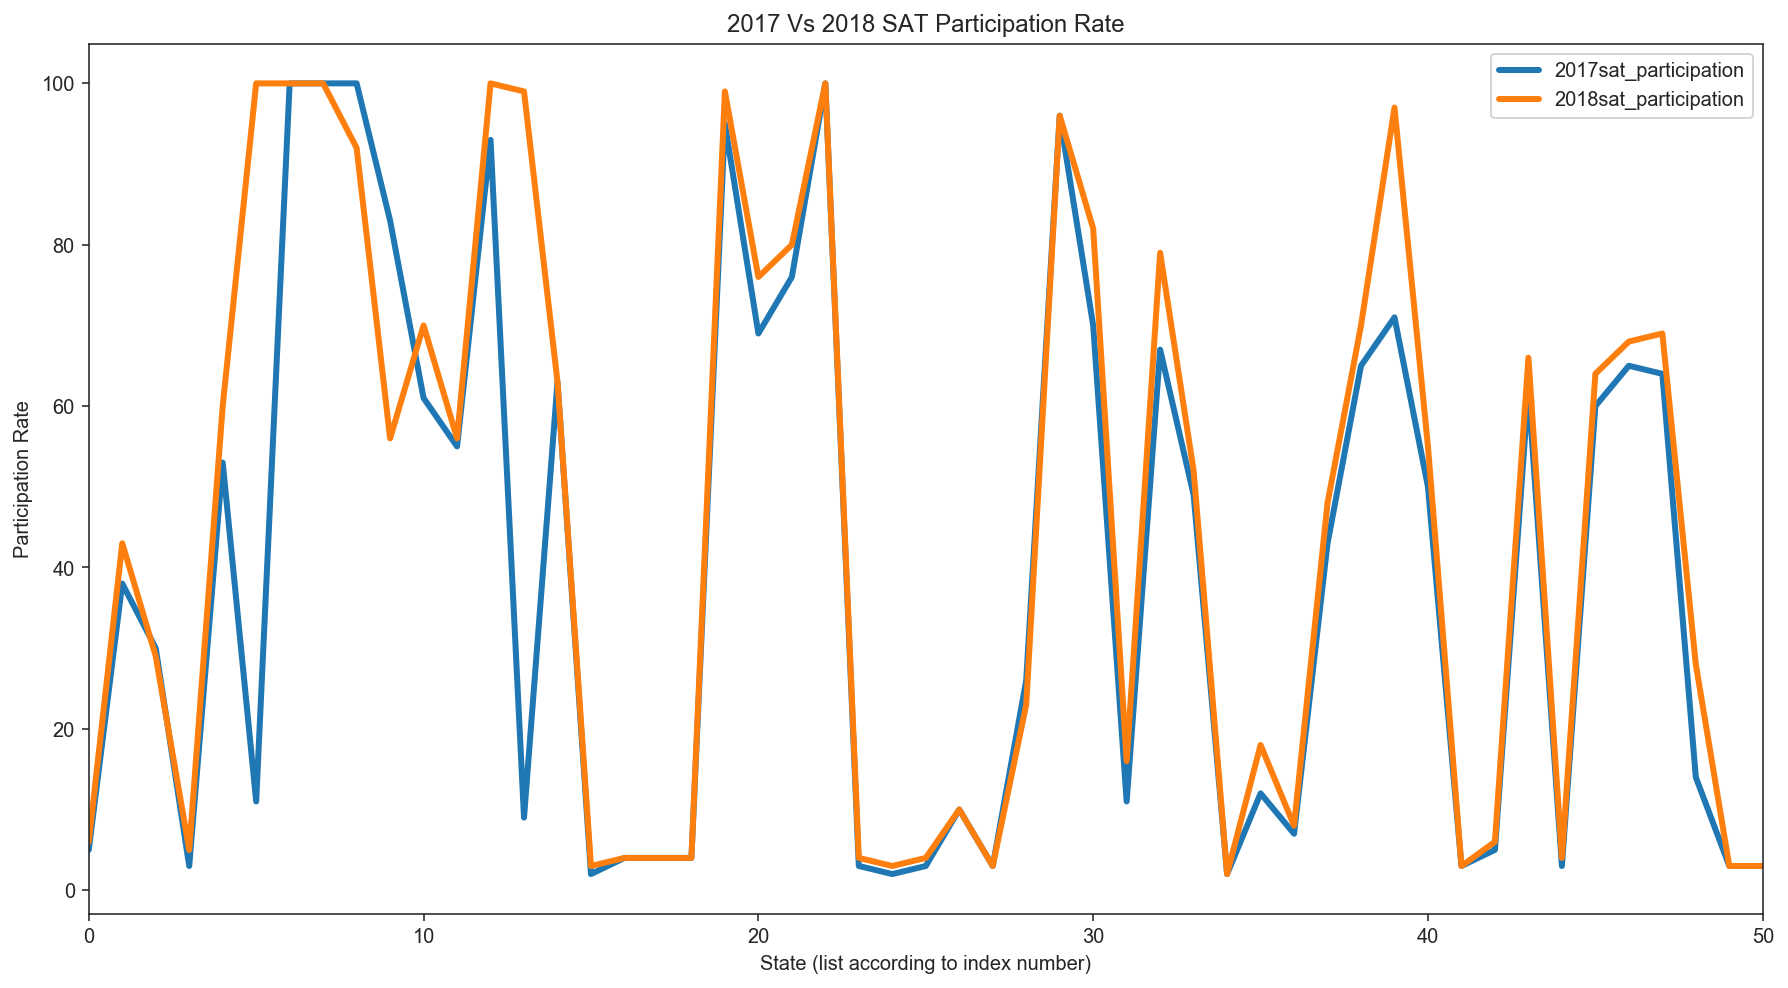

In [82]:
#Lineplot for SAT Participation Rate in Year 2017-2018
plt.figure(figsize = (15,6)) 
ax = final[['2017sat_participation', '2018sat_participation']].plot(figsize = (15,8), linewidth = 3);

plt.xlabel('State (list according to index number)');
plt.ylabel('Participation Rate');
plt.title('2017 Vs 2018 SAT Participation Rate')
ax.legend(loc=1);

<Figure size 1080x432 with 0 Axes>

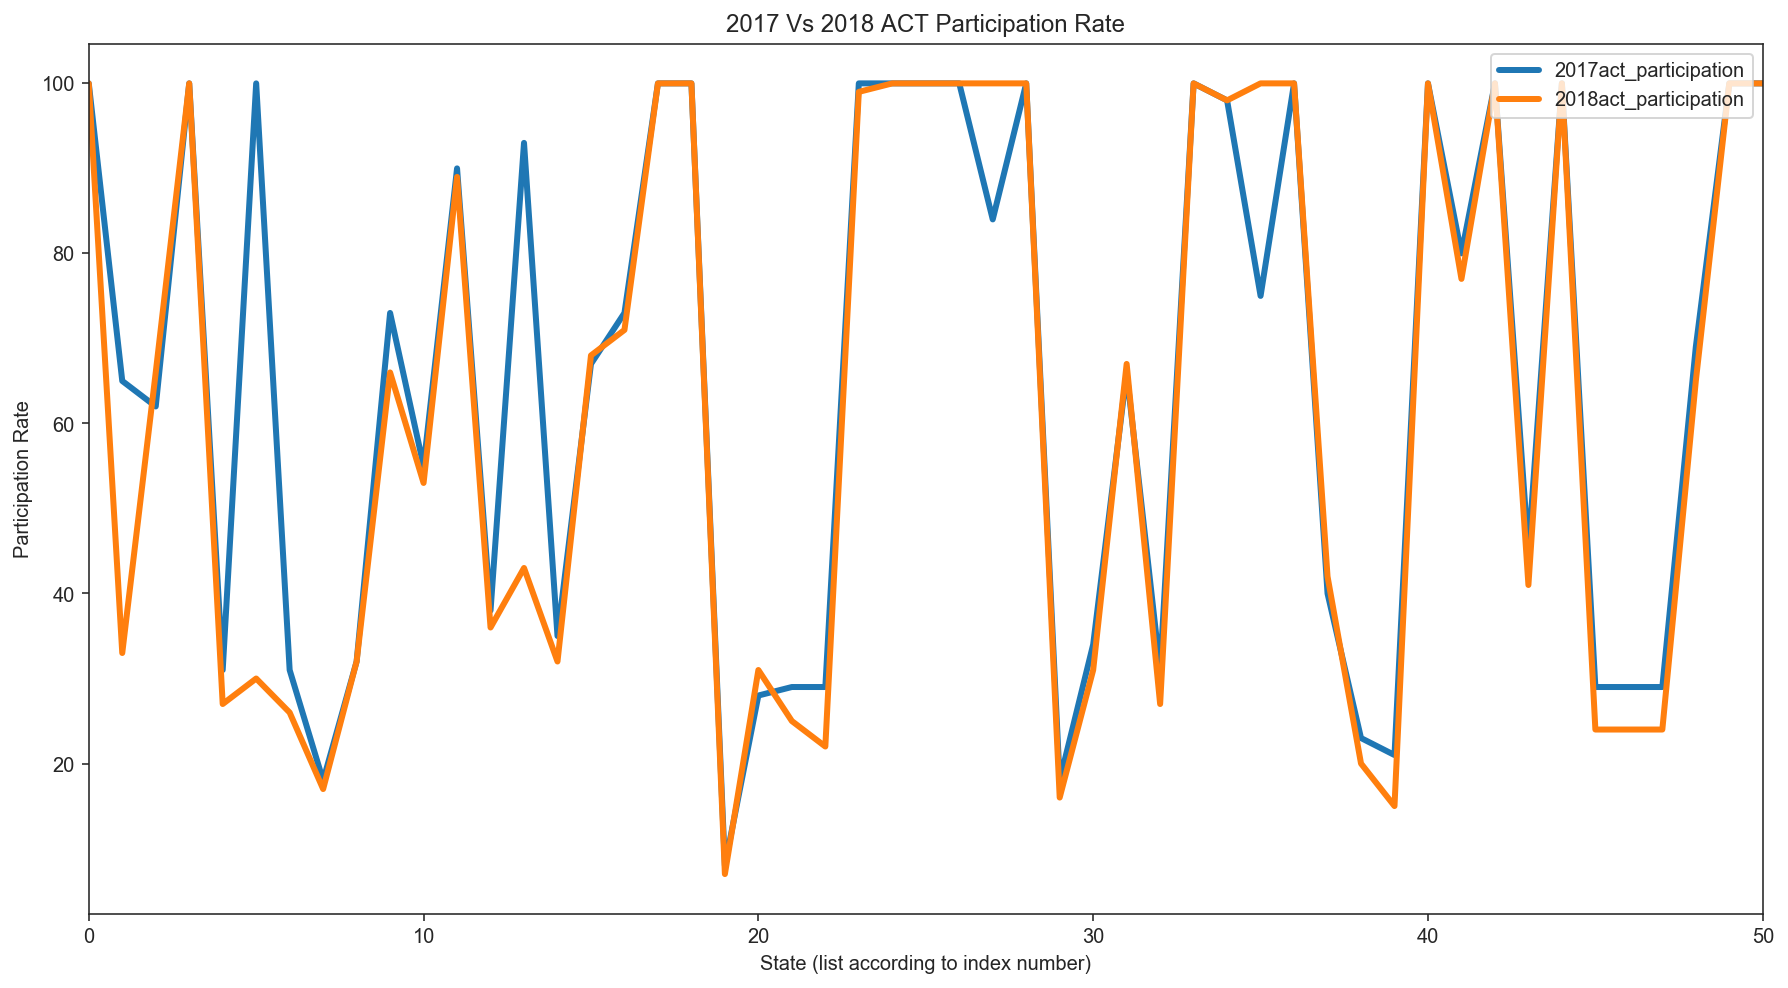

In [83]:
#Lineplot for ACT Participation Rate in Year 2017-2018
plt.figure(figsize = (15,6)) 
ax = final[['2017act_participation', '2018act_participation']].plot(figsize = (15,8),linewidth = 3 );

plt.xlabel('State (list according to index number)');
plt.ylabel('Participation Rate');
plt.title('2017 Vs 2018 ACT Participation Rate')
ax.legend(loc=1);

### Participation Rate: 2017 Vs 2018
#### SAT
- Line plot shows that participation rate for most of the state is similar between year 2017 and 2018.
- There are few states observed spike in participation rate in 2018 (that is participation rate increased significantly).
#### ACT
- Line plot shows that the participation rate for mostof the state is similar between year 2017 and 2018.
- Observed few states with dip in participation rate in 2018 (that is participation rate reduced significantly).

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

### Sumamarize the distributions for each variable 
Based on the calculated statistics in below cell, characteristics to look at listed below:
a) Central tendencay: mean, median, mode (normal distribution: these 3 values are equal)
b) Dispersion: range, standard deviation
c) Shape or skewness

#### Participation rate
- SAT participation rate is not normal for both year. In 2017, mean > median > mode. In 2018, median > mean > mode. The distribution show that more state is with lower participation rate.
- ACT participation rate is not normal for both year. Its mode > median > mean. It shows more sate is with higher participation rate.
- Both SAT and ACT participation rate is widely spread. The skewness values suggest that the shape is approximately symmetric as they are within +/-0.5.

#### SAT scores
- SAT scores for both individual subject and the total of them are not normal. The mean > median > mode. This shows that more state is with lower scores. 
- Distribution is spreading relatively wide. The skewness values suggest that the shape is approximately symmetric as they are within +/-0.5.

#### ACT scores
- ACT scores are relatively normal compared the the rest of the data. The mean, median, mode are close to each other.
- Distribution is relatively lesser spread. The skewness values suggest that the shape is approximately symmetric as they are within +/-0.5.


Note:
If skewness is less than −1 or greater than +1, the distribution is highly skewed.
If skewness is between −1 and −0.5 or between +0.5 and +1, the distribution is moderately skewed.
If skewness is between −0.5 and +0.5, the distribution is approximately symmetric.


In [84]:
# Calculate specific statistics for each variable in the final dataframe:
from statistics import mode
def ranges(x):
    return max(x) - min(x)
def modes (x):
    return mode(x)

final.iloc[:,1:].agg(['mean','median', ranges,'min','max','std', 'skew']).T

,mean,median,ranges,min,max,std,skew
2017sat_participation,39.803922,38.0,98.0,2.0,100.0,35.276632,0.346450
2017sat_erw,569.117647,559.0,162.0,482.0,644.0,45.666901,0.272693
2017sat_math,556.882353,548.0,183.0,468.0,651.0,47.121395,0.365040
2017sat_total,1126.098039,1107.0,345.0,950.0,1295.0,92.494812,0.310903
2017act_participation,65.254902,69.0,92.0,8.0,100.0,32.140842,-0.197989
2017act_english,20.931373,20.7,9.2,16.3,25.5,2.353677,0.352660
2017act_math,21.182353,20.9,7.3,18.0,25.3,1.981989,0.332683
2017act_reading,22.013725,21.8,7.9,18.1,26.0,2.067271,0.269366
2017act_science,21.450980,21.3,6.7,18.2,24.9,1.739353,0.218823
2017act_composite,21.519608,21.4,7.7,17.8,25.5,2.020695,0.319810


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

### Are the sample from populaton normally distributed?
#### Participation rate
- It is not normally distributed as the mean, median, and mode are not the same for both SAT and ACT. The distribution plot also shows that they are not normal and two peaks observed.
#### SAT score
- Similar trend observed in the SAT score as the participation rate.
#### ACT score
- Relatively, they are not too far way from normal distribution as the mean, median, mode are closer to each other.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

### Does normally distributed assumption hold for math, reading and rates?
#### Math
- Math score in SAT is not normally distributed as mean > median > mode.
- Math score in ACT might be okay with the normal distribution assumption as the mean, median mode value is closer to each other.

#### Reading
- Reading score in SAT is not normally distributed as mean > median > mode. Asides, it has more significant two peak observed in the distribution plot.
- Similarly, reading score in ACT is relatively closer to normal distribution as the mean, median, mode value is closer ot each other with not so significant on the second peak in the distribution plot.

#### Rates
- Participation rate is not normally distributed with two clear peaks observed in the distribution plot for both SAT and ACT. Thus, it cannot assumpt that the participation rates data is normally distributed.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

### Relationship between SAT and ACT participation rates in 2017
Yes,it make sense to conduct statistical inference.
I would like to find out are the participants of SAT come from the same group as ACT participants. That is, SAT participant same group as ACT participant.

#### 1. Null and alternative hypotheses

$$ H_0: \mu_{\text{SAT_participation_rate}} = \mu_{\text{ACT_participation_rate}} $$
$$ H_A: \mu_{\text{SAT_participation_rate}} \ne \mu_{\text{ACT_participation_rate}} $$

#### 2. Decide on a significance level. $\alpha = 0.05$

#### 3. Decide on a hypothesis test : **two-sample $t$-test**.


In [85]:
# Create a list for sat_participation and act_participation in 2017 respectively
sat = list(final['2017sat_participation'])
act = list(final['2017act_participation'])

In [86]:
# Perform calculation using scipy.stats.ttest_ind

t_stat, p_val = stats.ttest_ind(sat, act, equal_var=False)
print(t_stat)
print(p_val)

-3.808577890817054
0.00024238408285306908


#### P-value and relationship between SAT and ACT participation rate
The p-value calculated is 0.00024, which is < $\alpha = 0.05$. 
This means there is evidence to reject the null hypothesis and accept the alternative hypothesis.
That is likely to say that SAT participation is not coming from the same group as ACT group.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:
No, it is not appropriate to compared specific SAT and ACT math scores are they have different scoring system.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Text(0.5, 1.0, '2018 ACT Participation Rate')

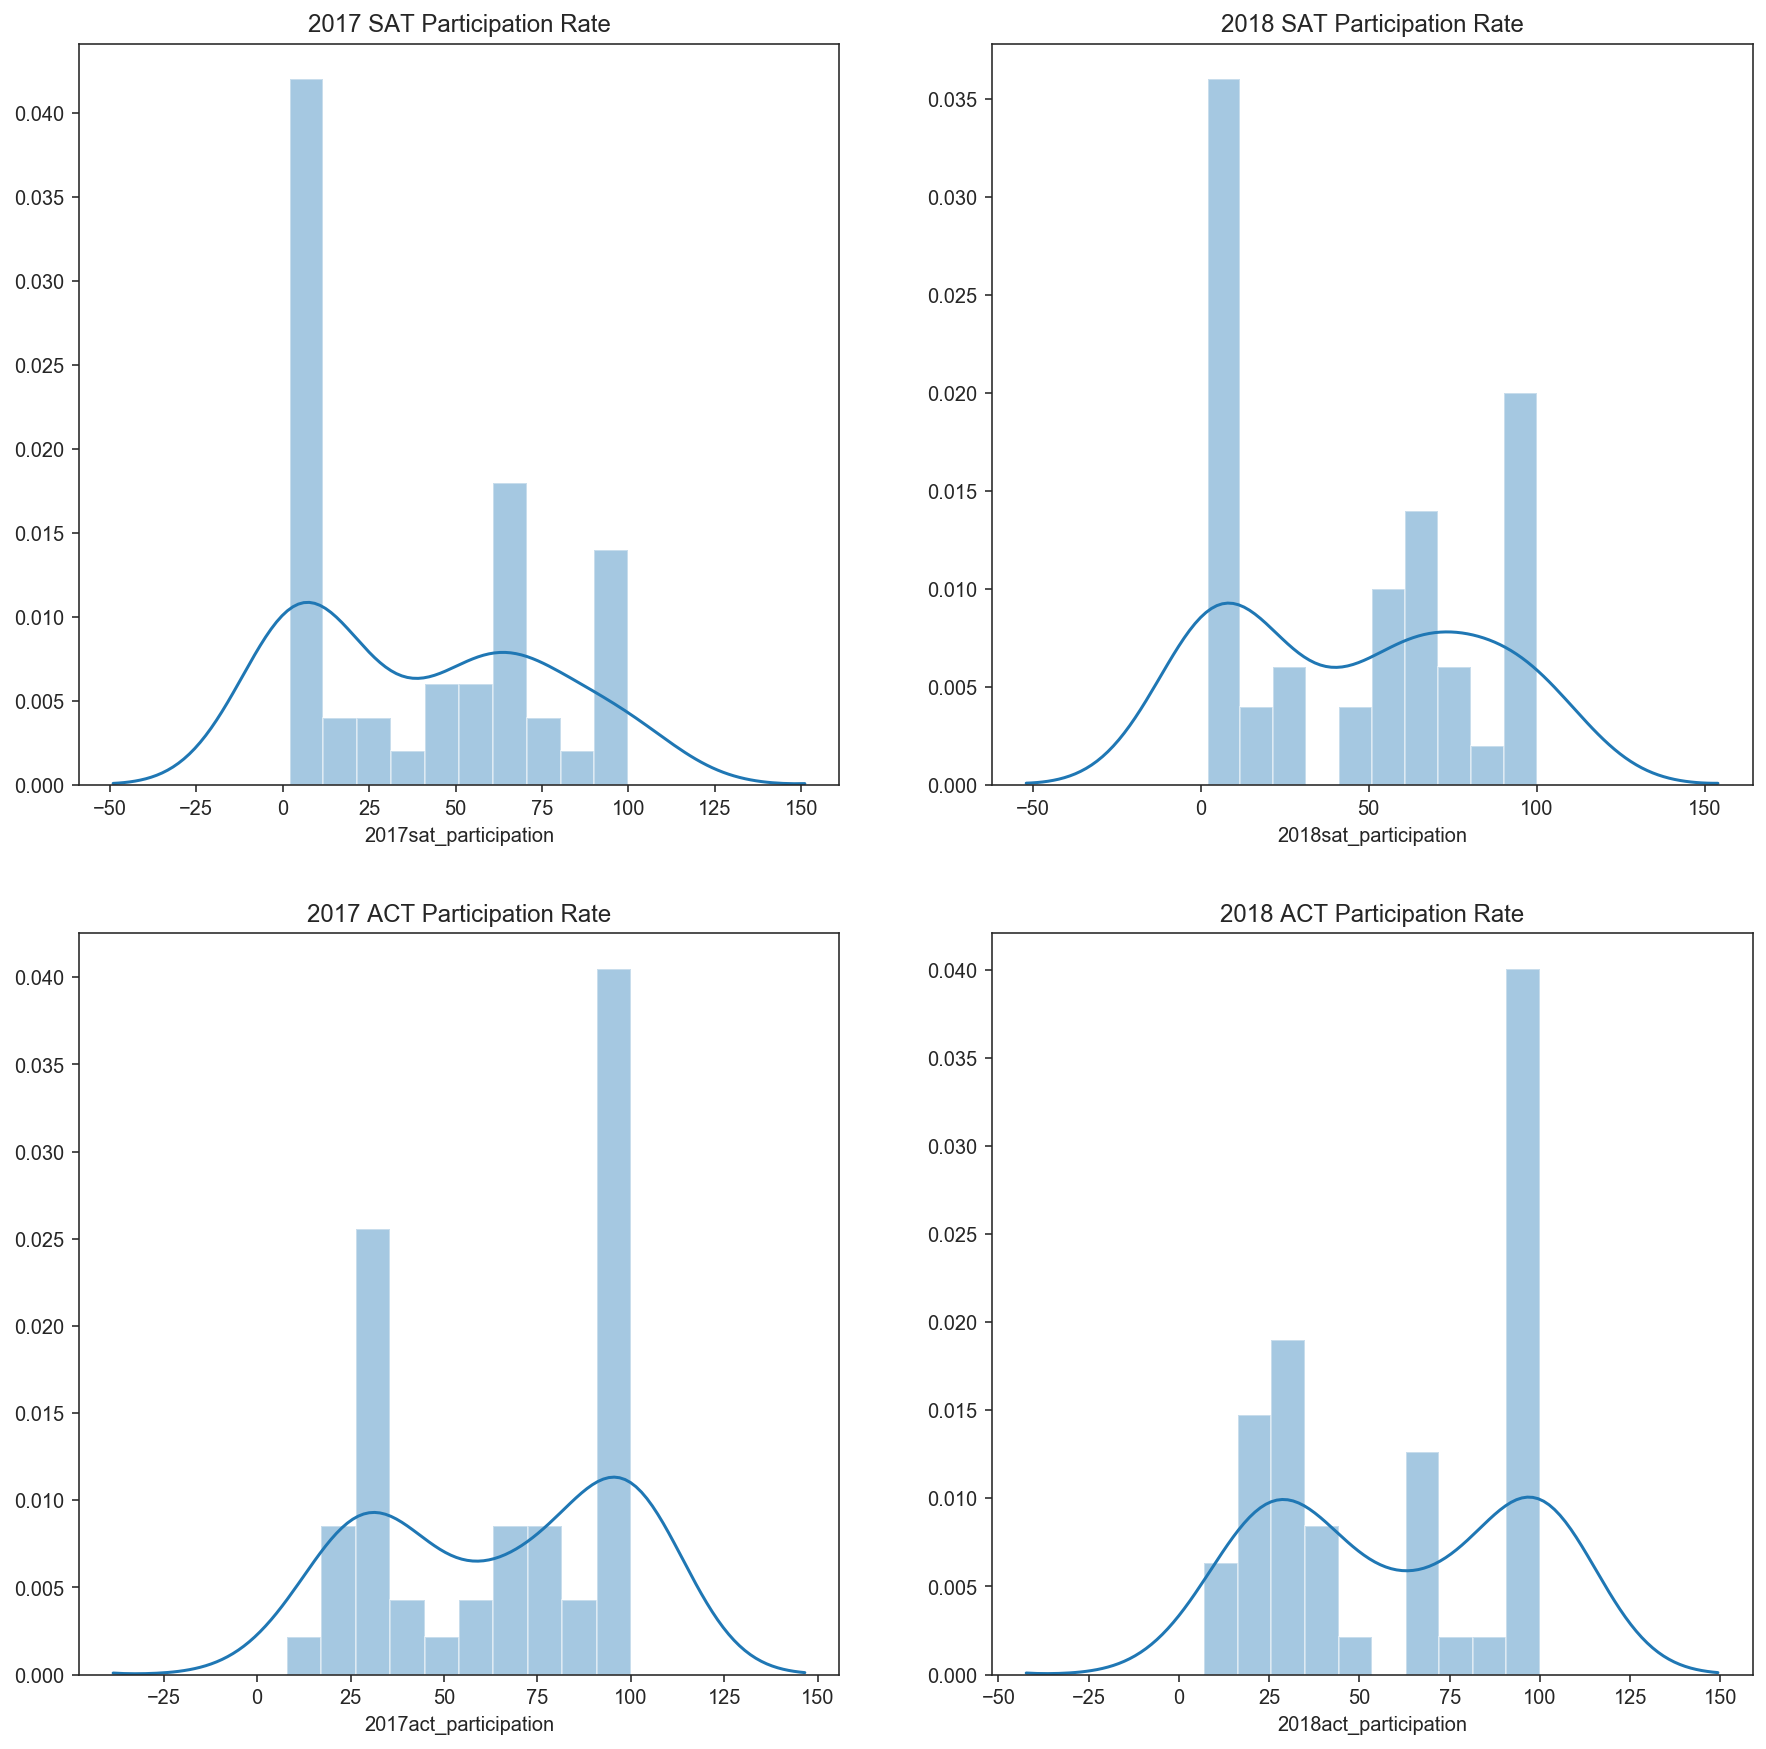

In [87]:
# Distribution plot for Participation Rate

fig, axs = plt.subplots(2, 2, figsize = (15,15))

sns.distplot(final['2017sat_participation'], bins = 10, ax = axs[0][0]);
axs[0][0].set_title("2017 SAT Participation Rate", fontsize=12)

sns.distplot(final['2018sat_participation'], bins = 10, ax = axs[0][1]);
axs[0][1].set_title("2018 SAT Participation Rate", fontsize=12)

sns.distplot(final['2017act_participation'], bins = 10, ax = axs[1][0]);
axs[1][0].set_title("2017 ACT Participation Rate", fontsize=12)

sns.distplot(final['2018act_participation'], bins = 10, ax = axs[1][1]);
axs[1][1].set_title("2018 ACT Participation Rate", fontsize=12)


Text(0.5, 1.0, '2018 SAT Total Score')

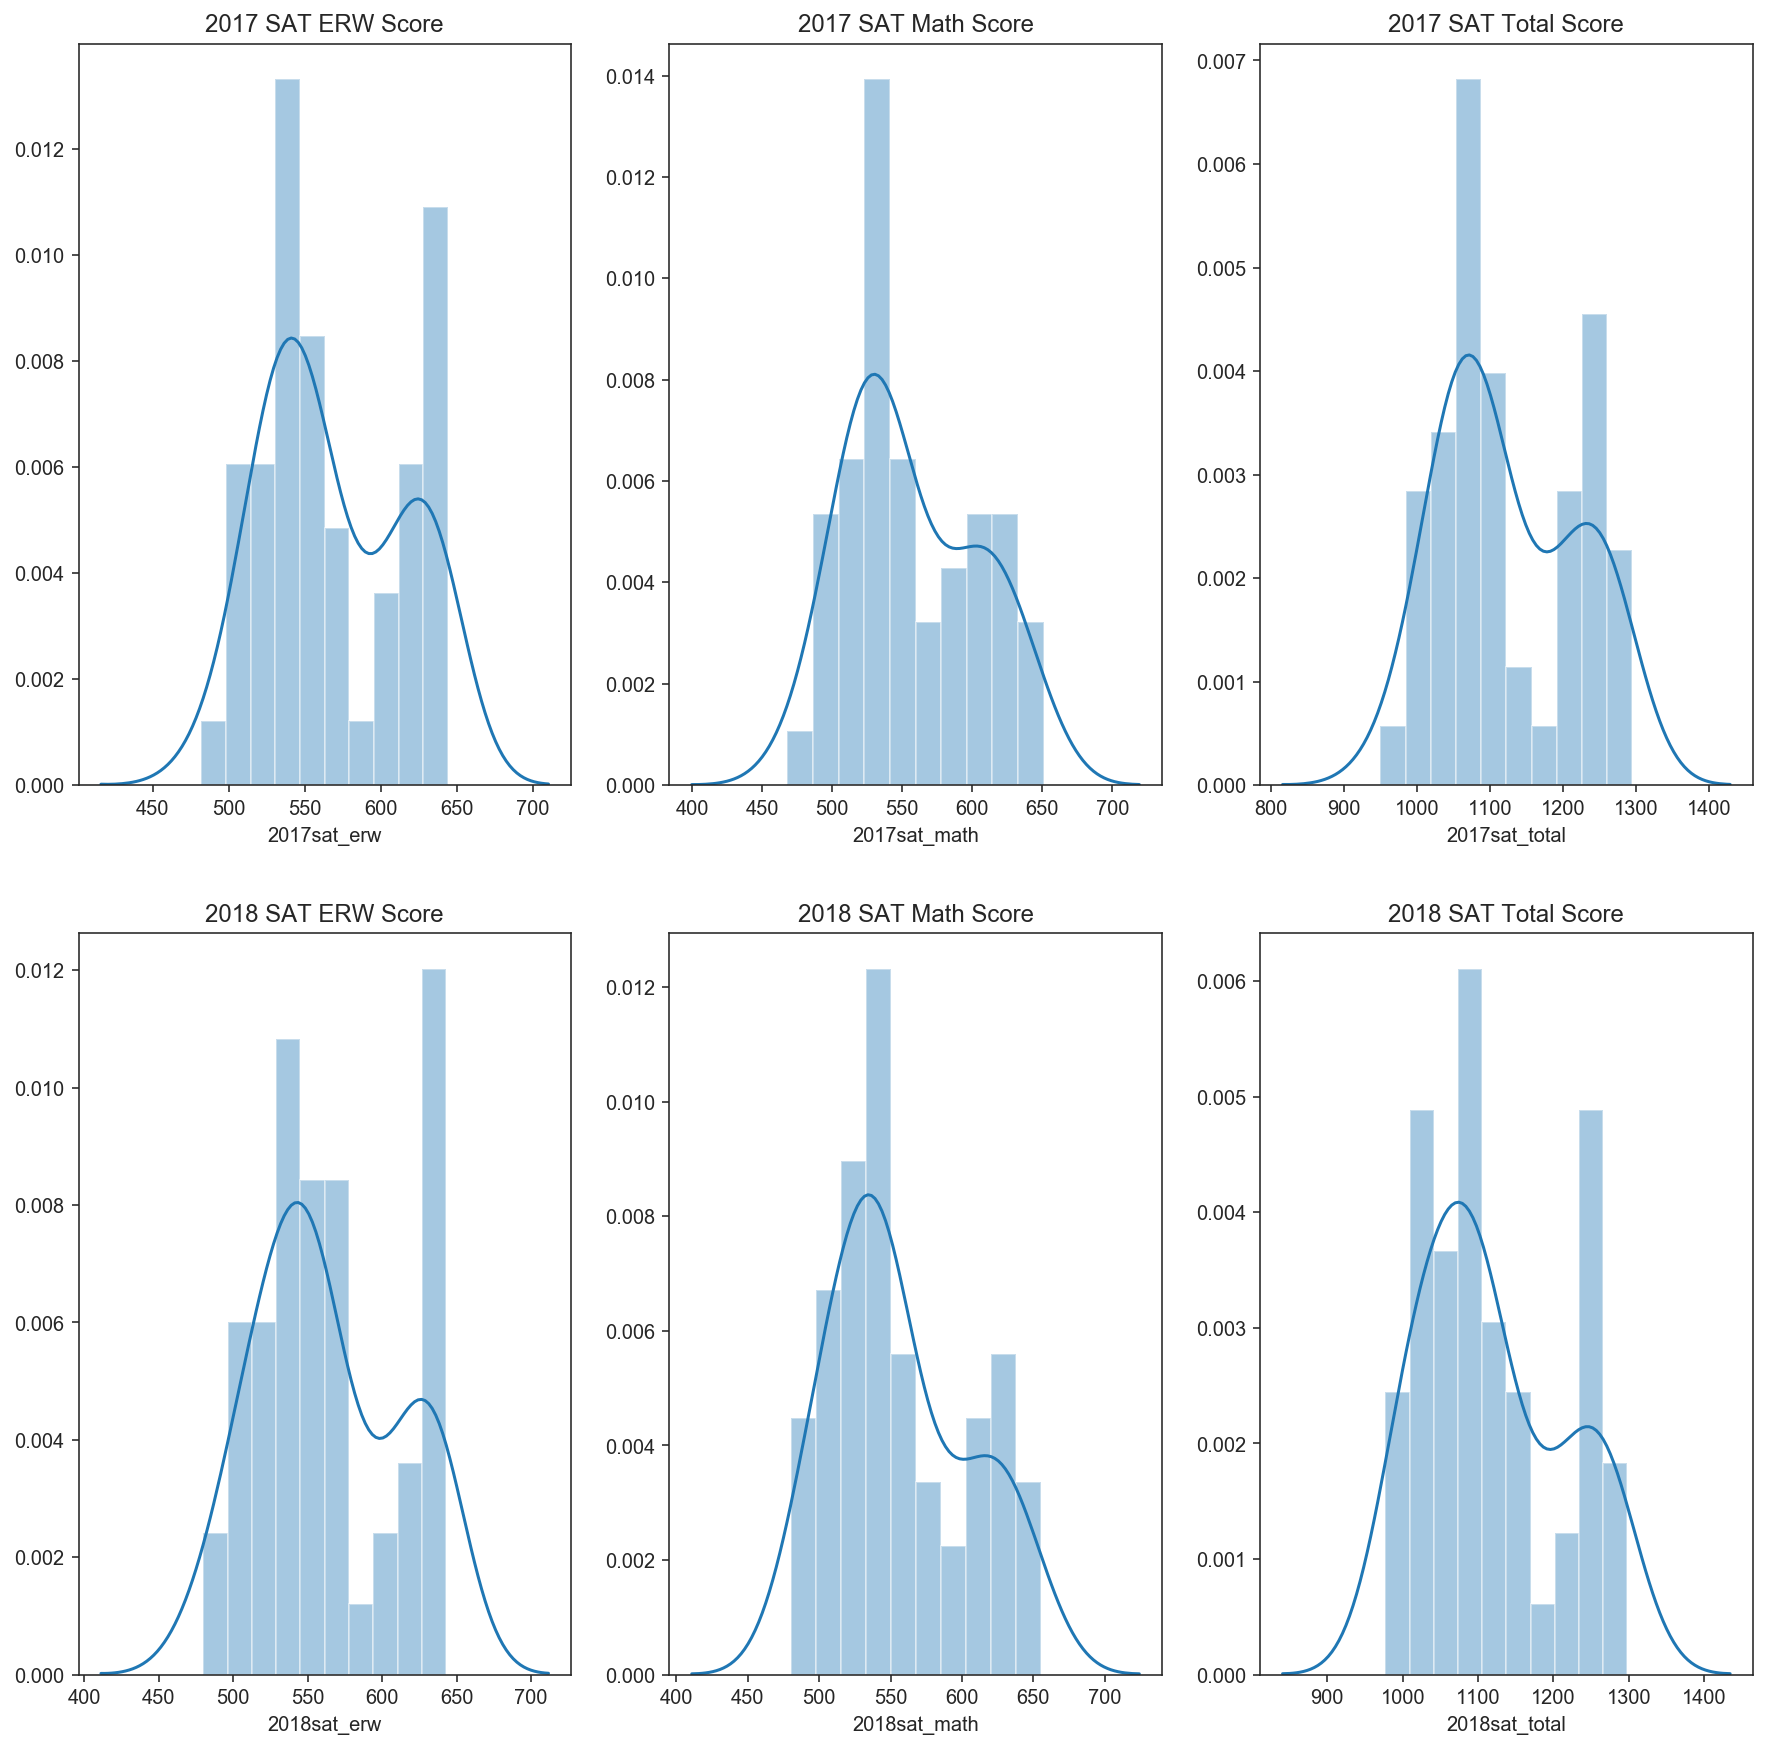

In [88]:
# Distribution plot for SAT Score

fig, axs = plt.subplots(2, 3, figsize = (15,15))

sns.distplot(final['2017sat_erw'], bins = 10, ax = axs[0][0]);
axs[0][0].set_title("2017 SAT ERW Score", fontsize=12)

sns.distplot(final['2017sat_math'], bins = 10, ax = axs[0][1]);
axs[0][1].set_title("2017 SAT Math Score", fontsize=12)

sns.distplot(final['2017sat_total'], bins = 10, ax = axs[0][2]);
axs[0][2].set_title("2017 SAT Total Score", fontsize=12)

sns.distplot(final['2018sat_erw'], bins = 10, ax = axs[1][0]);
axs[1][0].set_title("2018 SAT ERW Score", fontsize=12)

sns.distplot(final['2018sat_math'], bins = 10, ax = axs[1][1]);
axs[1][1].set_title("2018 SAT Math Score", fontsize=12)

sns.distplot(final['2018sat_total'], bins = 10, ax = axs[1][2]);
axs[1][2].set_title("2018 SAT Total Score", fontsize=12)

Text(0.5, 1.0, '2018 ACT composite')

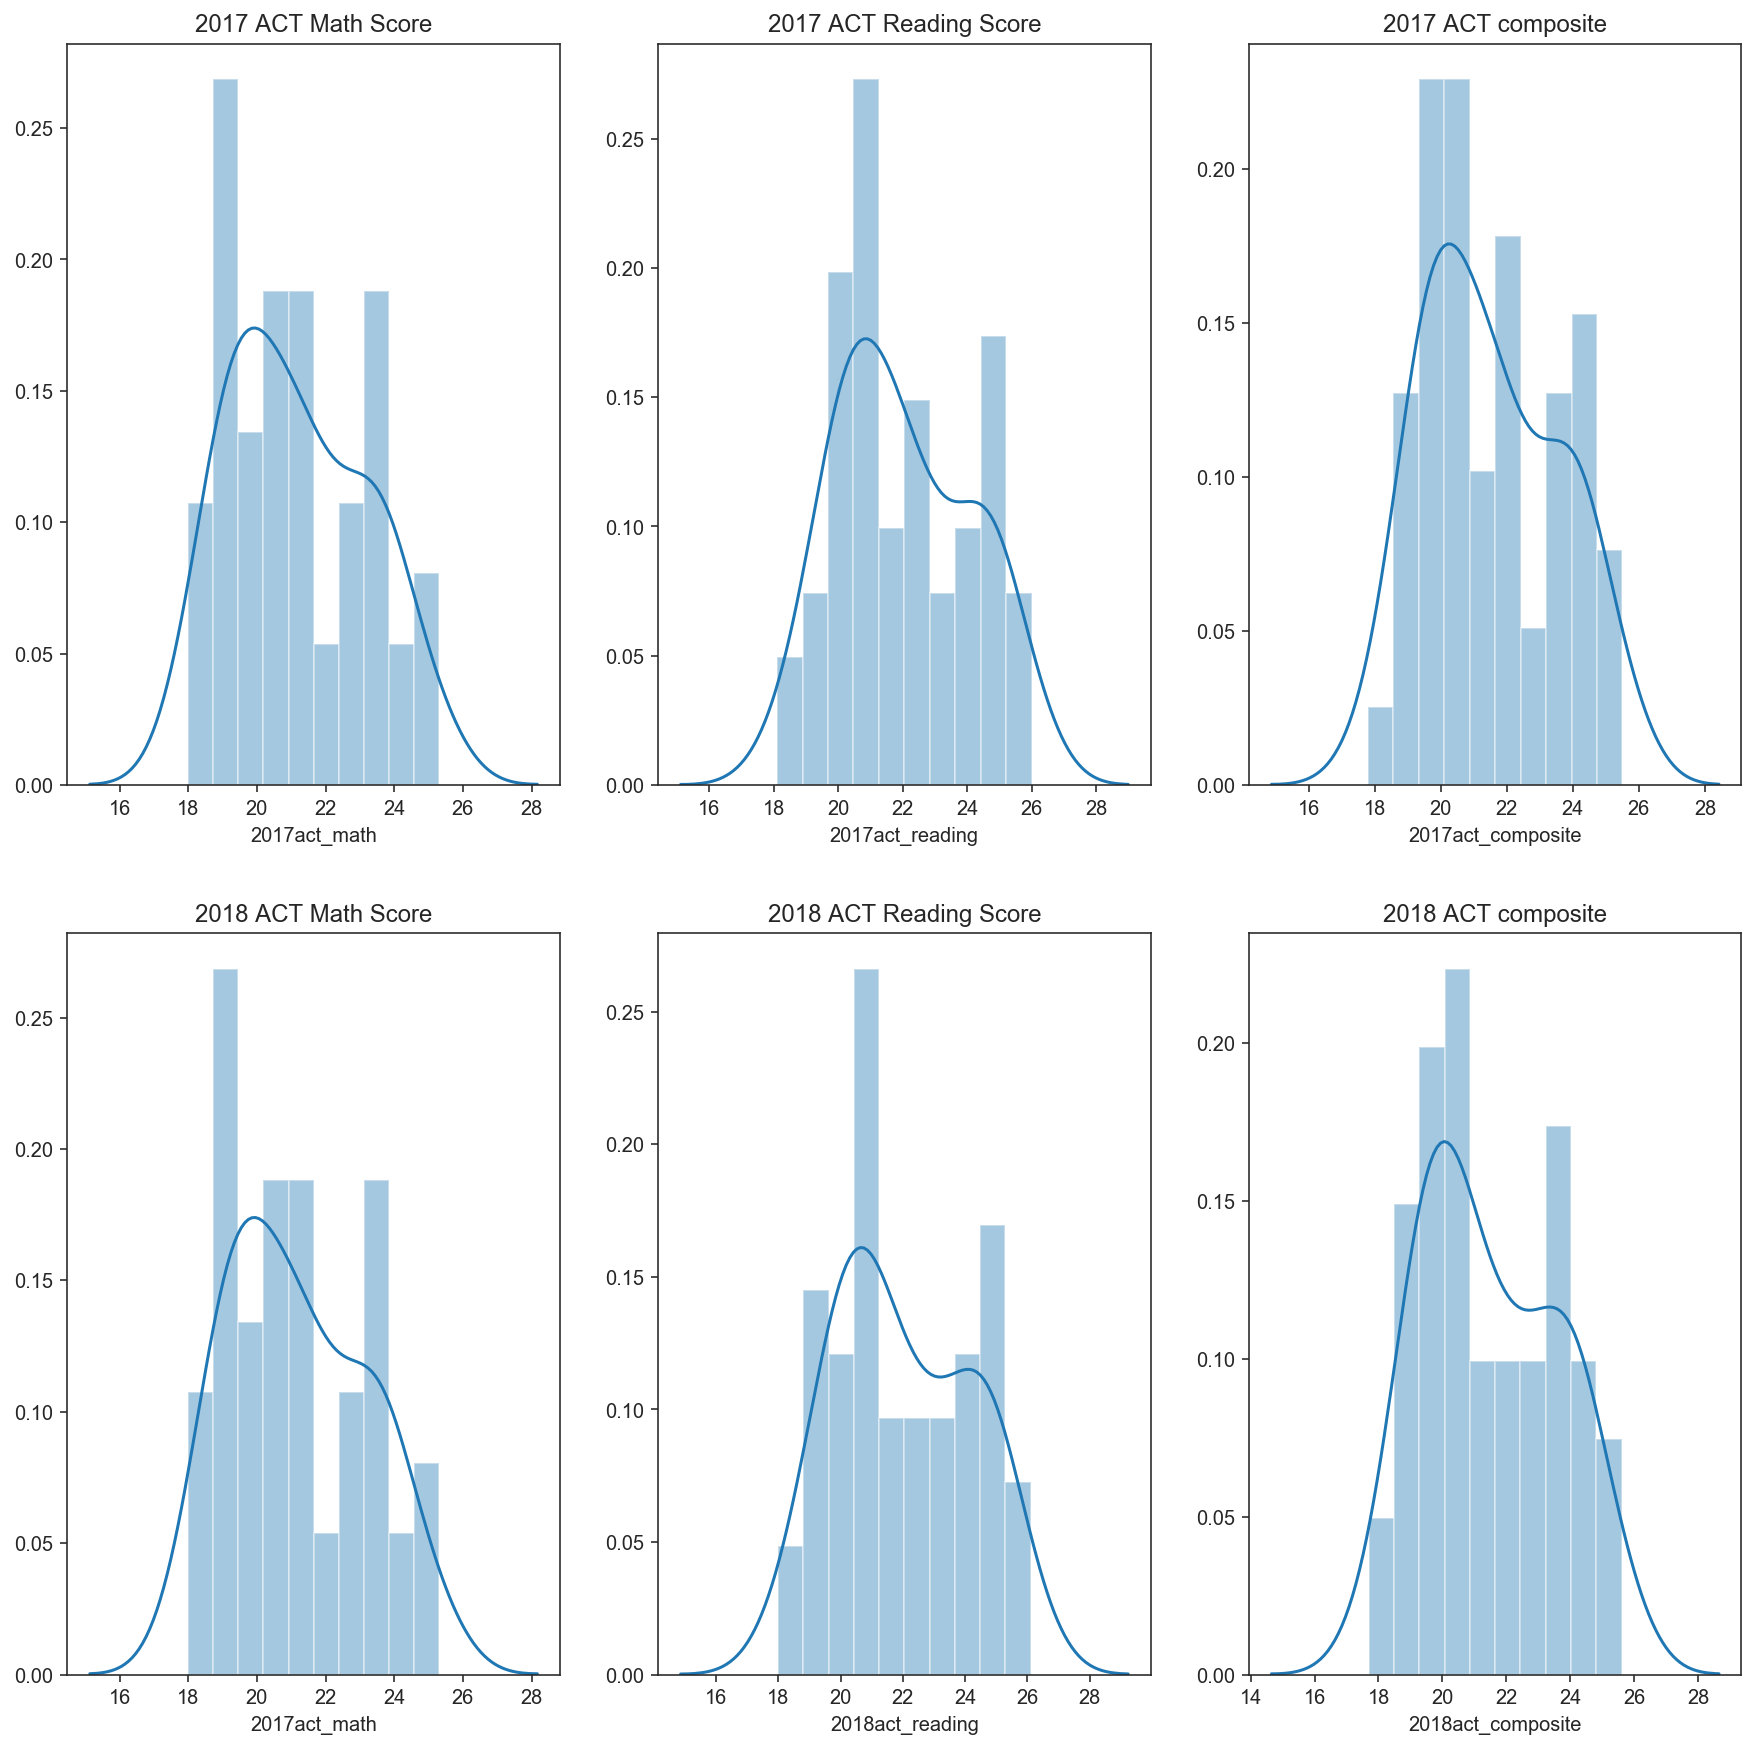

In [89]:
# Distribution plot for ACT Score

fig, axs = plt.subplots(2, 3, figsize = (15,15))

sns.distplot(final['2017act_math'], bins = 10, ax = axs[0][0]);
axs[0][0].set_title("2017 ACT Math Score", fontsize=12)

sns.distplot(final['2017act_reading'], bins = 10, ax = axs[0][1]);
axs[0][1].set_title("2017 ACT Reading Score", fontsize=12)

sns.distplot(final['2017act_composite'], bins = 10, ax = axs[0][2]);
axs[0][2].set_title("2017 ACT composite", fontsize=12)

sns.distplot(final['2017act_math'], bins = 10, ax = axs[1][0]);
axs[1][0].set_title("2018 ACT Math Score", fontsize=12)

sns.distplot(final['2018act_reading'], bins = 10, ax = axs[1][1]);
axs[1][1].set_title("2018 ACT Reading Score", fontsize=12)

sns.distplot(final['2018act_composite'], bins = 10, ax = axs[1][2]);
axs[1][2].set_title("2018 ACT composite", fontsize=12)

In [90]:
#sns.pairplot(final);

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [91]:
# SAT participation rate spike in 2018
mask_sat17_lowrate = final['2017sat_participation'] < 20
mask_sat18_highrate = final['2018sat_participation'] > 90

final[mask_sat17_lowrate & mask_sat18_highrate].loc[:,['state', '2017sat_participation', 
                '2018sat_participation', '2017act_participation','2018act_participation']]

,state,2017sat_participation,2018sat_participation,2017act_participation,2018act_participation
5,Colorado,11.0,100.0,100.0,30.0
13,Illinois,9.0,99.0,93.0,43.0


### Spike in SAT participation rate
- Colorado and Illinois participation rate surge in 2018 as shown in above table.
- Contrary, ACT participation rate shrink about 60%-70% in these two states in year 2018.

This trend is due to the states are contracted with the College Board to administer the SAT to some or all high school juniors for free.
1. 2016-17 school year, all Colorado juniors in public schools will take the SAT.
2. Beginning with the 2016-17 school year, all Illinois juniors must take the SAT.

Other than Colorado and Illinois, those states that are working with the College Board to administer the SAT are having high participation rates. Those states includes: Connecticut, Delaware, District of Columbia, Idaho, Maine, Michigan, New Hampshire.

Source: https://blog.prepscholar.com/which-states-require-the-sat


In [92]:
# State with High SAT participation rate (>90%)
mask_sat17_highrate = final['2017sat_participation'] > 90

final[mask_sat17_highrate & mask_sat18_highrate].loc[:,['state', '2017sat_participation', 
                '2018sat_participation', '2017act_participation','2018act_participation']]

,state,2017sat_participation,2018sat_participation,2017act_participation,2018act_participation
6,Connecticut,100.0,100.0,31.0,26.0
7,Delaware,100.0,100.0,18.0,17.0
8,District of Columbia,100.0,92.0,32.0,32.0
12,Idaho,93.0,100.0,38.0,36.0
19,Maine,95.0,99.0,8.0,7.0
22,Michigan,100.0,100.0,29.0,22.0
29,New Hampshire,96.0,96.0,18.0,16.0


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [93]:
# State with Low SAT participation rate (<20%) and not so high in ACT participation rate
mask_sat18_lowrate = final['2018sat_participation'] < 20
mask_act18_lowrate = final['2018act_participation'] < 70

(final[mask_sat18_lowrate & mask_act18_lowrate].loc[:,['state', '2017sat_participation', 
                '2018sat_participation', '2017act_participation','2018act_participation']]
.sort_values('2018sat_participation'))

,state,2017sat_participation,2018sat_participation,2017act_participation,2018act_participation
15,Iowa,2.0,3.0,67.0,68.0
31,New Mexico,11.0,16.0,66.0,67.0


### Choose one state with lower participation rate and provide suggestion
#### Iowa is chosen as:
- It is with low participation rate in 2018 (at 3%).
- The ACT participation rate in 2018 is not close to 100% (at 68%).
- ACT is not a mandatory test in Iowa.

Source - Which state requires the ACT: 
https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice

#### Key takeaways:
- Participants only take one test, either SAT or ACT not both.
- State education departments or local education agencies testing system or policy. State that requires SAT test as college admission test will spur the participation rate.
- 
#### Recommandation
1. Work with local authority to make SAT as a mandatory test for college entrance exam testing requirements.
2. Full or partial funding for the test. Fee waiver for low-income students.
3. Free and high quality study material, free resource to better prepare high school student for the test.
4. Expand the SAT school day to more state, which it allows students to take the SAT in their own school on a weekday, rather than taking it on a Saturday at different school.


### References:

https://blog.prepscholar.com/which-states-require-the-sat

https://blog.prepscholar.com/which-states-require-the-act-full-list-and-advice

https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/?noredirect=on
